# Tune Image segmentation S value

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import pandas as pd
from scipy import ndimage
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

In [2]:
maemin = 10000
mae = np.zeros([101])
for i in range (50,151):
          
    def calculate_centroid_and_area(image):

        img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        mask = cv2.inRange(img_hsv,(32, i, 20), (82, 255, 255))

        area = np.sum(mask)/255
        centroid = ndimage.center_of_mass(mask)

        return [area,centroid]

    # Assumes there are an equal number of top and front images
    number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
    number_of_plants = int(number_of_files / 2)

    results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

    for x in range(number_of_plants):
        row = []

        row.append("Plant" + str(x+1))

        image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
        image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')

        front_result = calculate_centroid_and_area(image_front)
        top_result = calculate_centroid_and_area(image_top)

        row = row + front_result + top_result

        results.loc[len(results)] = row

    PlantData = pd.read_csv("../PlantData.csv")

    Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')
    # Separate Target Variable and Predictor Variables
    TargetVariable=['LAI']
    Predictors=['Area_top','Area_front']

    X=Data[Predictors].values
    y=Data[TargetVariable].values

    ### Sandardization of data ###
    from sklearn.preprocessing import StandardScaler
    PredictorScaler=StandardScaler()
    TargetVarScaler=StandardScaler()

    # Storing the fit object for later reference
    PredictorScalerFit=PredictorScaler.fit(X)
    TargetVarScalerFit=TargetVarScaler.fit(y)

    # Generating the standardized values of X and y
    X=PredictorScalerFit.transform(X)
    y=TargetVarScalerFit.transform(y)

    # Split the data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # create ANN model
    model = Sequential()

    # Defining the Input layer and FIRST hidden layer, both are same!
    model.add(Dense(units=5, input_dim=2, kernel_initializer='normal', activation='relu'))

    # Defining the Second layer of the model
    # after the first layer we don't have to specify input_dim as keras configure it automatically
    model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

    # The output neuron is a single fully connected node 
    # Since we will be predicting a single number
    model.add(Dense(1, kernel_initializer='normal'))

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fitting the ANN to the Training set
    model.fit(X_train, y_train ,batch_size = 20, epochs = 500, verbose=1)

    close_predictions = model.predict(X_test)   
    close_predictions = TargetVarScalerFit.inverse_transform(close_predictions)
    close_predictions = close_predictions.flatten()
    y_test = TargetVarScalerFit.inverse_transform(y_test)
    y_test = y_test.flatten()
    mae[i-50] = sum(abs(close_predictions - y_test)) / y_test.shape[0]
    if mae[i-50] < maemin:
        maemin = mae[i-50]
        iopt = i
            



Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9727
Epoch 2/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9722
Epoch 3/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9714
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9707
Epoch 5/500
2/2 [==============================] - 0s 996us/step - loss: 0.9699
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9690
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9684
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9675
Epoch 9/500
2/2 [==============================] - 0s 496us/step - loss: 0.9668
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9664
Epoch 11/500
2/2 [==============================] - 0s 494us/step - loss: 0.9651
Epoch 12/500
2/2 [==============================] - 0s 496us/step - loss: 0.9643
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 516us/step - loss: 0.2279
Epoch 203/500
2/2 [==============================] - 0s 897us/step - loss: 0.2276
Epoch 204/500
2/2 [==============================] - 0s 501us/step - loss: 0.2274
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2273
Epoch 206/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2270
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2270
Epoch 208/500
2/2 [==============================] - 0s 725us/step - loss: 0.2270
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2266
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2269
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2264
Epoch 212/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2263
Epoch 213/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2262
Epoch 214/500
2/2 [========

2/2 [==============================] - 0s 995us/step - loss: 0.2207
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.2207
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2206
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2205
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2206
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2204
Epoch 408/500
2/2 [==============================] - 0s 996us/step - loss: 0.2204
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2204
Epoch 410/500
2/2 [==============================] - 0s 503us/step - loss: 0.2203
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2204
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2202
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2201
Epoch 414/500
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 0.3670
Epoch 104/500
2/2 [==============================] - 0s 500us/step - loss: 0.3615
Epoch 105/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3562
Epoch 106/500
2/2 [==============================] - 0s 998us/step - loss: 0.3517
Epoch 107/500
2/2 [==============================] - 0s 501us/step - loss: 0.3460
Epoch 108/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3416
Epoch 109/500
2/2 [==============================] - 0s 501us/step - loss: 0.3366
Epoch 110/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3327
Epoch 111/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3291
Epoch 112/500
2/2 [==============================] - 0s 831us/step - loss: 0.3249
Epoch 113/500
2/2 [==============================] - 0s 816us/step - loss: 0.3208
Epoch 114/500
2/2 [==============================] - 0s 754us/step - loss: 0.3171
Epoch 115/500
2/2 [==================

2/2 [==============================] - 0s 0s/step - loss: 0.2190
Epoch 304/500
2/2 [==============================] - 0s 499us/step - loss: 0.2189
Epoch 305/500
2/2 [==============================] - 0s 503us/step - loss: 0.2192
Epoch 306/500
2/2 [==============================] - 0s 501us/step - loss: 0.2188
Epoch 307/500
2/2 [==============================] - 0s 500us/step - loss: 0.2189
Epoch 308/500
2/2 [==============================] - 0s 999us/step - loss: 0.2188
Epoch 309/500
2/2 [==============================] - 0s 499us/step - loss: 0.2187
Epoch 310/500
2/2 [==============================] - 0s 500us/step - loss: 0.2187
Epoch 311/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2187
Epoch 312/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2186
Epoch 313/500
2/2 [==============================] - 0s 501us/step - loss: 0.2186
Epoch 314/500
2/2 [==============================] - 0s 495us/step - loss: 0.2186
Epoch 315/500
2/2 [==================

2/2 [==============================] - 0s 2ms/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 775us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 612us/step - loss: 0.9709
Epoch 6/500
2/2 [==============================] - 0s 908us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 965us/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 0.9699
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.9694
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9690
Epoch 11/500
2/2 [==============================] - 0s 689us/step - loss: 0.9686
Epoch 12/500
2/2 [==============================] - 0s 661us/step - loss: 0.9680
Epoch 13/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9675
Epoch 14/500
2/2 [==============================] - 0s 499us/step - loss: 0.9673
Epoch 15/500
2/2 [==============================] - 0s 501u

2/2 [==============================] - 0s 998us/step - loss: 0.2224
Epoch 205/500
2/2 [==============================] - 0s 687us/step - loss: 0.2224
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2223
Epoch 207/500
2/2 [==============================] - 0s 0s/step - loss: 0.2221
Epoch 208/500
2/2 [==============================] - 0s 506us/step - loss: 0.2221
Epoch 209/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2223
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2218
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2220
Epoch 212/500
2/2 [==============================] - 0s 505us/step - loss: 0.2217
Epoch 213/500
2/2 [==============================] - 0s 494us/step - loss: 0.2216
Epoch 214/500
2/2 [==============================] - 0s 500us/step - loss: 0.2216
Epoch 215/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2216
Epoch 216/500
2/2 [====================

2/2 [==============================] - 0s 0s/step - loss: 0.2164
Epoch 405/500
2/2 [==============================] - 0s 576us/step - loss: 0.2165
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2164
Epoch 407/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2164
Epoch 408/500
2/2 [==============================] - 0s 999us/step - loss: 0.2165
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2167
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2163
Epoch 411/500
2/2 [==============================] - 0s 502us/step - loss: 0.2166
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2165
Epoch 413/500
2/2 [==============================] - 0s 997us/step - loss: 0.2163
Epoch 414/500
2/2 [==============================] - 0s 500us/step - loss: 0.2164
Epoch 415/500
2/2 [==============================] - 0s 501us/step - loss: 0.2165
Epoch 416/500
2/2 [================

Epoch 106/500
2/2 [==============================] - 0s 993us/step - loss: 0.5203
Epoch 107/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5155
Epoch 108/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5111
Epoch 109/500
2/2 [==============================] - 0s 499us/step - loss: 0.5074
Epoch 110/500
2/2 [==============================] - 0s 500us/step - loss: 0.5031
Epoch 111/500
2/2 [==============================] - 0s 499us/step - loss: 0.4985
Epoch 112/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4950
Epoch 113/500
2/2 [==============================] - 0s 501us/step - loss: 0.4903
Epoch 114/500
2/2 [==============================] - 0s 500us/step - loss: 0.4871
Epoch 115/500
2/2 [==============================] - 0s 755us/step - loss: 0.4834
Epoch 116/500
2/2 [==============================] - 0s 501us/step - loss: 0.4788
Epoch 117/500
2/2 [==============================] - 0s 500us/step - loss: 0.4750
Epoch 118/500
2/2 [===

2/2 [==============================] - 0s 1ms/step - loss: 0.2446
Epoch 307/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2446
Epoch 308/500
2/2 [==============================] - 0s 501us/step - loss: 0.2438
Epoch 309/500
2/2 [==============================] - 0s 500us/step - loss: 0.2436
Epoch 310/500
2/2 [==============================] - 0s 535us/step - loss: 0.2434
Epoch 311/500
2/2 [==============================] - 0s 999us/step - loss: 0.2435
Epoch 312/500
2/2 [==============================] - 0s 500us/step - loss: 0.2429
Epoch 313/500
2/2 [==============================] - 0s 500us/step - loss: 0.2429
Epoch 314/500
2/2 [==============================] - 0s 500us/step - loss: 0.2428
Epoch 315/500
2/2 [==============================] - 0s 500us/step - loss: 0.2423
Epoch 316/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2423
Epoch 317/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2420
Epoch 318/500
2/2 [===================

2/2 [==============================] - 0s 749us/step - loss: 0.9706
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9690
Epoch 10/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9685
Epoch 11/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9681
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9675
Epoch 13/500
2/2 [==============================] - 0s 499us/step - loss: 0.9671
Epoch 14/500
2/2 [==============================] - 0s 602us/step - loss: 0.9660
Epoch 15/500
2/2 [==============================] - 0s 500us/step - loss: 0.9655
Epoch 16/500
2/2 [==============================] - 0s 500us/step - loss: 0.9647
Epoch 17/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9640
Epoch 18/500
2/2 [==============================] 

2/2 [==============================] - 0s 500us/step - loss: 0.2239
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2237
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2234
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2233
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 214/500
2/2 [==============================] - 0s 500us/step - loss: 0.2228
Epoch 215/500
2/2 [==============================] - 0s 500us/step - loss: 0.2227
Epoch 216/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2225
Epoch 217/500
2/2 [==============================] - 0s 500us/step - loss: 0.2225
Epoch 218/500
2/2 [==============================] - 0s 500us/step - loss: 0.2224
Epoch 219/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2165
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2162
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2161
Epoch 410/500
2/2 [==============================] - 0s 499us/step - loss: 0.2160
Epoch 411/500
2/2 [==============================] - 0s 501us/step - loss: 0.2162
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2160
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2160
Epoch 414/500
2/2 [==============================] - 0s 501us/step - loss: 0.2160
Epoch 415/500
2/2 [==============================] - 0s 500us/step - loss: 0.2160
Epoch 416/500
2/2 [==============================] - 0s 995us/step - loss: 0.2159
Epoch 417/500
2/2 [==============================] - 0s 500us/step - loss: 0.2159
Epoch 418/500
2/2 [==============================] - 0s 501us/step - loss: 0.2159
Epoch 419/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9726
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9721
Epoch 3/500
2/2 [==============================] - 0s 519us/step - loss: 0.9718
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9709
Epoch 5/500
2/2 [==============================] - 0s 996us/step - loss: 0.9704
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9701
Epoch 7/500
2/2 [==============================] - 0s 496us/step - loss: 0.9695
Epoch 8/500
2/2 [==============================] - 0s 499us/step - loss: 0.9689
Epoch 9/500
2/2 [==============================] - 0s 507us/step - loss: 0.9685
Epoch 10/500
2/2 [==============================] - 0s 0s/step - loss: 0.9676
Epoch 11/500
2/2 [==============================] - 0s 501us/step - loss: 0.9670
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9663
Epoch 13/500
2/2 [==============================] 

2/2 [==============================] - 0s 494us/step - loss: 0.2218
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2217
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2217
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2215
Epoch 206/500
2/2 [==============================] - 0s 506us/step - loss: 0.2215
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2214
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2218
Epoch 209/500
2/2 [==============================] - 0s 505us/step - loss: 0.2214
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2213
Epoch 211/500
2/2 [==============================] - 0s 764us/step - loss: 0.2214
Epoch 212/500
2/2 [==============================] - 0s 994us/step - loss: 0.2213
Epoch 213/500
2/2 [==============================] - 0s 506us/step - loss: 0.2212
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 515us/step - loss: 0.2167
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2167
Epoch 404/500
2/2 [==============================] - 0s 505us/step - loss: 0.2167
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2166
Epoch 406/500
2/2 [==============================] - 0s 501us/step - loss: 0.2167
Epoch 407/500
2/2 [==============================] - 0s 506us/step - loss: 0.2166
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2167
Epoch 409/500
2/2 [==============================] - 0s 505us/step - loss: 0.2167
Epoch 410/500
2/2 [==============================] - 0s 495us/step - loss: 0.2167
Epoch 411/500
2/2 [==============================] - 0s 999us/step - loss: 0.2167
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2166
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2168
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 733us/step - loss: 0.9734
Epoch 2/500
2/2 [==============================] - 0s 515us/step - loss: 0.9728
Epoch 3/500
2/2 [==============================] - 0s 842us/step - loss: 0.9724
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9717
Epoch 5/500
2/2 [==============================] - 0s 946us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 730us/step - loss: 0.9709
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 508us/step - loss: 0.9697
Epoch 9/500
2/2 [==============================] - 0s 517us/step - loss: 0.9694
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9690
Epoch 11/500
2/2 [==============================] - 0s 645us/step - loss: 0.9687
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9681
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 500us/step - loss: 0.2232
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2231
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.2230
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2228
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2226
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.2225
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2225
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.2223
Epoch 211/500
2/2 [==============================] - 0s 999us/step - loss: 0.2222
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2220
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2220
Epoch 214/500
2/2 [===========

2/2 [==============================] - 0s 500us/step - loss: 0.2137
Epoch 403/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2136
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2135
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2136
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2136
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2135
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2135
Epoch 409/500
2/2 [==============================] - 0s 501us/step - loss: 0.2135
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2134
Epoch 411/500
2/2 [==============================] - 0s 502us/step - loss: 0.2136
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2134
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2138
Epoch 414/500
2/2 [============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9727
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9721
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9717
Epoch 4/500
2/2 [==============================] - 0s 499us/step - loss: 0.9713
Epoch 5/500
2/2 [==============================] - 0s 499us/step - loss: 0.9710
Epoch 6/500
2/2 [==============================] - 0s 501us/step - loss: 0.9701
Epoch 7/500
2/2 [==============================] - 0s 998us/step - loss: 0.9697
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9692
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.9686
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9679
Epoch 11/500
2/2 [==============================] - 0s 504us/step - loss: 0.9671
Epoch 12/500
2/2 [==============================] - 0s 696us/step - loss: 0.9662
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 499us/step - loss: 0.2208
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2207
Epoch 204/500
2/2 [==============================] - 0s 501us/step - loss: 0.2205
Epoch 205/500
2/2 [==============================] - 0s 520us/step - loss: 0.2205
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2205
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2202
Epoch 208/500
2/2 [==============================] - 0s 493us/step - loss: 0.2201
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2200
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2199
Epoch 211/500
2/2 [==============================] - 0s 679us/step - loss: 0.2199
Epoch 212/500
2/2 [==============================] - 0s 0s/step - loss: 0.2197
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2197
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 501us/step - loss: 0.2154
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2152
Epoch 404/500
2/2 [==============================] - 0s 509us/step - loss: 0.2153
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.2152
Epoch 406/500
2/2 [==============================] - 0s 497us/step - loss: 0.2153
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2155
Epoch 408/500
2/2 [==============================] - 0s 494us/step - loss: 0.2152
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2153
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2152
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2153
Epoch 412/500
2/2 [==============================] - 0s 999us/step - loss: 0.2153
Epoch 413/500
2/2 [==============================] - 0s 996us/step - loss: 0.2155
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9725
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9718
Epoch 3/500
2/2 [==============================] - 0s 501us/step - loss: 0.9711
Epoch 4/500
2/2 [==============================] - 0s 502us/step - loss: 0.9702
Epoch 5/500
2/2 [==============================] - 0s 999us/step - loss: 0.9697
Epoch 6/500
2/2 [==============================] - 0s 530us/step - loss: 0.9690
Epoch 7/500
2/2 [==============================] - 0s 998us/step - loss: 0.9681
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9672
Epoch 9/500
2/2 [==============================] - 0s 499us/step - loss: 0.9662
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9655
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9648
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9637
Epoch 13/500
2/2 [==========================

2/2 [==============================] - 0s 500us/step - loss: 0.2399
Epoch 203/500
2/2 [==============================] - 0s 442us/step - loss: 0.2399
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2395
Epoch 205/500
2/2 [==============================] - 0s 501us/step - loss: 0.2393
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2390
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.2387
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.2384
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2382
Epoch 210/500
2/2 [==============================] - 0s 999us/step - loss: 0.2380
Epoch 211/500
2/2 [==============================] - 0s 501us/step - loss: 0.2376
Epoch 212/500
2/2 [==============================] - 0s 687us/step - loss: 0.2375
Epoch 213/500
2/2 [==============================] - 0s 501us/step - loss: 0.2370
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 501us/step - loss: 0.2182
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2181
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2180
Epoch 405/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2180
Epoch 406/500
2/2 [==============================] - 0s 560us/step - loss: 0.2179
Epoch 407/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2179
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2179
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.2178
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2178
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2178
Epoch 412/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2178
Epoch 413/500
2/2 [==============================] - 0s 497us/step - loss: 0.2177
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 900us/step - loss: 0.9722
Epoch 2/500
2/2 [==============================] - 0s 450us/step - loss: 0.9714
Epoch 3/500
2/2 [==============================] - 0s 961us/step - loss: 0.9707
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9703
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9694
Epoch 6/500
2/2 [==============================] - 0s 502us/step - loss: 0.9688
Epoch 7/500
2/2 [==============================] - 0s 499us/step - loss: 0.9685
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9674
Epoch 9/500
2/2 [==============================] - 0s 537us/step - loss: 0.9666
Epoch 10/500
2/2 [==============================] - 0s 505us/step - loss: 0.9656
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9648
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9639
Epoch 13/500
2/2 [=====================

2/2 [==============================] - 0s 500us/step - loss: 0.2208
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2204
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2202
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2202
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2200
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2200
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2199
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2197
Epoch 210/500
2/2 [==============================] - 0s 996us/step - loss: 0.2196
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2196
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2196
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2194
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 1ms/step - loss: 0.2123
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2126
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 407/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2124
Epoch 408/500
2/2 [==============================] - 0s 504us/step - loss: 0.2124
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 412/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2124
Epoch 413/500
2/2 [==============================] - 0s 613us/step - loss: 0.2124
Epoch 414/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 887us/step - loss: 0.9739
Epoch 2/500
2/2 [==============================] - 0s 489us/step - loss: 0.9733
Epoch 3/500
2/2 [==============================] - 0s 485us/step - loss: 0.9728
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9723
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9717
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9714
Epoch 7/500
2/2 [==============================] - 0s 551us/step - loss: 0.9704
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9701
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9694
Epoch 10/500
2/2 [==============================] - 0s 501us/step - loss: 0.9692
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9683
Epoch 12/500
2/2 [==============================] - 0s 665us/step - loss: 0.9678
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.2235
Epoch 203/500
2/2 [==============================] - 0s 494us/step - loss: 0.2234
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2234
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2235
Epoch 206/500
2/2 [==============================] - 0s 497us/step - loss: 0.2231
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2231
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2231
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2228
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2227
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2227
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2194
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2194
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2194
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2195
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2193
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2194
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2194
Epoch 409/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2194
Epoch 410/500
2/2 [==============================] - 0s 501us/step - loss: 0.2194
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2194
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2194
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2193
Epoch 414/500
2/2 [================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9735
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9732
Epoch 3/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9724
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9724
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9718
Epoch 6/500
2/2 [==============================] - 0s 501us/step - loss: 0.9716
Epoch 7/500
2/2 [==============================] - 0s 964us/step - loss: 0.9711
Epoch 8/500
2/2 [==============================] - 0s 463us/step - loss: 0.9710
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9705
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9702
Epoch 11/500
2/2 [==============================] - 0s 535us/step - loss: 0.9697
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9692
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 501us/step - loss: 0.2232
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2232
Epoch 204/500
2/2 [==============================] - 0s 501us/step - loss: 0.2229
Epoch 205/500
2/2 [==============================] - 0s 751us/step - loss: 0.2227
Epoch 206/500
2/2 [==============================] - 0s 493us/step - loss: 0.2225
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2226
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2222
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2227
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2219
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2218
Epoch 212/500
2/2 [==============================] - 0s 505us/step - loss: 0.2217
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2215
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2155
Epoch 403/500
2/2 [==============================] - 0s 494us/step - loss: 0.2156
Epoch 404/500
2/2 [==============================] - 0s 505us/step - loss: 0.2156
Epoch 405/500
2/2 [==============================] - 0s 576us/step - loss: 0.2155
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.2154
Epoch 407/500
2/2 [==============================] - 0s 505us/step - loss: 0.2154
Epoch 408/500
2/2 [==============================] - 0s 494us/step - loss: 0.2155
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2154
Epoch 410/500
2/2 [==============================] - 0s 998us/step - loss: 0.2154
Epoch 411/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2155
Epoch 412/500
2/2 [==============================] - 0s 505us/step - loss: 0.2153
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2157
Epoch 414/500
2/2 [==========

Epoch 1/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9741
Epoch 2/500
2/2 [==============================] - 0s 999us/step - loss: 0.9736
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9732
Epoch 4/500
2/2 [==============================] - 0s 523us/step - loss: 0.9727
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9723
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9718
Epoch 7/500
2/2 [==============================] - 0s 501us/step - loss: 0.9715
Epoch 8/500
2/2 [==============================] - 0s 499us/step - loss: 0.9712
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9705
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9703
Epoch 11/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9699
Epoch 12/500
2/2 [==============================] - 0s 525us/step - loss: 0.9690
Epoch 13/500
2/2 [========================

2/2 [==============================] - 0s 1ms/step - loss: 0.2253
Epoch 203/500
2/2 [==============================] - 0s 501us/step - loss: 0.2252
Epoch 204/500
2/2 [==============================] - 0s 501us/step - loss: 0.2250
Epoch 205/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2248
Epoch 206/500
2/2 [==============================] - 0s 499us/step - loss: 0.2250
Epoch 207/500
2/2 [==============================] - 0s 514us/step - loss: 0.2246
Epoch 208/500
2/2 [==============================] - 0s 499us/step - loss: 0.2243
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2242
Epoch 210/500
2/2 [==============================] - 0s 501us/step - loss: 0.2240
Epoch 211/500
2/2 [==============================] - 0s 499us/step - loss: 0.2240
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2238
Epoch 213/500
2/2 [==============================] - 0s 499us/step - loss: 0.2236
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 1ms/step - loss: 0.2155
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2157
Epoch 404/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2155
Epoch 405/500
2/2 [==============================] - 0s 541us/step - loss: 0.2155
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.2154
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2154
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2155
Epoch 409/500
2/2 [==============================] - 0s 740us/step - loss: 0.2154
Epoch 410/500
2/2 [==============================] - 0s 536us/step - loss: 0.2154
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2153
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2153
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2153
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9722
Epoch 3/500
2/2 [==============================] - 0s 571us/step - loss: 0.9715
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9709
Epoch 5/500
2/2 [==============================] - 0s 405us/step - loss: 0.9703
Epoch 6/500
2/2 [==============================] - 0s 556us/step - loss: 0.9696
Epoch 7/500
2/2 [==============================] - 0s 635us/step - loss: 0.9688
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9682
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9675
Epoch 10/500
2/2 [==============================] - 0s 154us/step - loss: 0.9670
Epoch 11/500
2/2 [==============================] - 0s 0s/step - loss: 0.9663
Epoch 12/500
2/2 [==============================] - 0s 476us/step - loss: 0.9656
Epoch 13/500
2/2 [==============================] 

2/2 [==============================] - 0s 1000us/step - loss: 0.2242
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2242
Epoch 204/500
2/2 [==============================] - 0s 498us/step - loss: 0.2239
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2235
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2233
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2232
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.2230
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2228
Epoch 210/500
2/2 [==============================] - 0s 501us/step - loss: 0.2227
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2225
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2223
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2224
Epoch 214/500
2/2 [==========

2/2 [==============================] - 0s 249us/step - loss: 0.2143
Epoch 403/500
2/2 [==============================] - 0s 754us/step - loss: 0.2142
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2141
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2140
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2142
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2141
Epoch 408/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2140
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.2140
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2141
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2140
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2140
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2140
Epoch 414/500
2/2 [============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9726
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9719
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9715
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9708
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9702
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9696
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9689
Epoch 8/500
2/2 [==============================] - 0s 573us/step - loss: 0.9683
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9673
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9668
Epoch 11/500
2/2 [==============================] - 0s 501us/step - loss: 0.9663
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9652
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 500us/step - loss: 0.2393
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2390
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2389
Epoch 205/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2387
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2385
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2385
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2382
Epoch 209/500
2/2 [==============================] - 0s 505us/step - loss: 0.2381
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2379
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2377
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2376
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2375
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 717us/step - loss: 0.2193
Epoch 403/500
2/2 [==============================] - 0s 504us/step - loss: 0.2192
Epoch 404/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2192
Epoch 406/500
2/2 [==============================] - 0s 514us/step - loss: 0.2192
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2193
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2191
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2191
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2191
Epoch 411/500
2/2 [==============================] - 0s 767us/step - loss: 0.2192
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2190
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2190
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 499us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 498us/step - loss: 0.9710
Epoch 6/500
2/2 [==============================] - 0s 493us/step - loss: 0.9705
Epoch 7/500
2/2 [==============================] - 0s 506us/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 698us/step - loss: 0.9692
Epoch 9/500
2/2 [==============================] - 0s 475us/step - loss: 0.9684
Epoch 10/500
2/2 [==============================] - 0s 413us/step - loss: 0.9677
Epoch 11/500
2/2 [==============================] - 0s 515us/step - loss: 0.9667
Epoch 12/500
2/2 [==============================] - 0s 812us/step - loss: 0.9663
Epoch 13/500
2/2 [==========================

2/2 [==============================] - 0s 505us/step - loss: 0.2195
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2192
Epoch 204/500
2/2 [==============================] - 0s 999us/step - loss: 0.2195
Epoch 205/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2190
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2189
Epoch 207/500
2/2 [==============================] - 0s 557us/step - loss: 0.2187
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.2186
Epoch 209/500
2/2 [==============================] - 0s 506us/step - loss: 0.2184
Epoch 210/500
2/2 [==============================] - 0s 495us/step - loss: 0.2183
Epoch 211/500
2/2 [==============================] - 0s 496us/step - loss: 0.2182
Epoch 212/500
2/2 [==============================] - 0s 547us/step - loss: 0.2181
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2181
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 659us/step - loss: 0.2118
Epoch 403/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2118
Epoch 404/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2119
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2122
Epoch 406/500
2/2 [==============================] - 0s 0s/step - loss: 0.2120
Epoch 407/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2120
Epoch 408/500
2/2 [==============================] - 0s 494us/step - loss: 0.2119
Epoch 409/500
2/2 [==============================] - 0s 0s/step - loss: 0.2119
Epoch 410/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2121
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2120
Epoch 412/500
2/2 [==============================] - 0s 506us/step - loss: 0.2119
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2120
Epoch 414/500
2/2 [========================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9737
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9731
Epoch 3/500
2/2 [==============================] - 0s 501us/step - loss: 0.9728
Epoch 4/500
2/2 [==============================] - 0s 498us/step - loss: 0.9724
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9721
Epoch 6/500
2/2 [==============================] - 0s 999us/step - loss: 0.9718
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9715
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9711
Epoch 9/500
2/2 [==============================] - 0s 501us/step - loss: 0.9706
Epoch 10/500
2/2 [==============================] - 0s 494us/step - loss: 0.9703
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9701
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9695
Epoch 13/500
2/2 [==============================

2/2 [==============================] - 0s 500us/step - loss: 0.2234
Epoch 203/500
2/2 [==============================] - 0s 499us/step - loss: 0.2232
Epoch 204/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2229
Epoch 205/500
2/2 [==============================] - 0s 522us/step - loss: 0.2227
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2226
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2223
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2225
Epoch 209/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2220
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2217
Epoch 211/500
2/2 [==============================] - 0s 518us/step - loss: 0.2216
Epoch 212/500
2/2 [==============================] - 0s 504us/step - loss: 0.2214
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2213
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2145
Epoch 403/500
2/2 [==============================] - 0s 250us/step - loss: 0.2145
Epoch 404/500
2/2 [==============================] - 0s 499us/step - loss: 0.2144
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2144
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2145
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2147
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2144
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.2144
Epoch 410/500
2/2 [==============================] - 0s 502us/step - loss: 0.2145
Epoch 411/500
2/2 [==============================] - 0s 506us/step - loss: 0.2144
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2145
Epoch 413/500
2/2 [==============================] - 0s 997us/step - loss: 0.2144
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9739
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9733
Epoch 3/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9727
Epoch 4/500
2/2 [==============================] - 0s 507us/step - loss: 0.9726
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9720
Epoch 6/500
2/2 [==============================] - 0s 499us/step - loss: 0.9717
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9712
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9709
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9702
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9701
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9695
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9691
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 1ms/step - loss: 0.2174
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2173
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2172
Epoch 205/500
2/2 [==============================] - 0s 510us/step - loss: 0.2171
Epoch 206/500
2/2 [==============================] - 0s 996us/step - loss: 0.2170
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2169
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2169
Epoch 209/500
2/2 [==============================] - 0s 999us/step - loss: 0.2168
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2168
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2170
Epoch 212/500
2/2 [==============================] - 0s 998us/step - loss: 0.2165
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2166
Epoch 214/500
2/2 [=================

2/2 [==============================] - 0s 1ms/step - loss: 0.2139
Epoch 403/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2140
Epoch 404/500
2/2 [==============================] - 0s 561us/step - loss: 0.2138
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2138
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2138
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2138
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2138
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.2138
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2140
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2138
Epoch 412/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2140
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2139
Epoch 414/500
2/2 [================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9723
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9719
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9715
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9709
Epoch 6/500
2/2 [==============================] - 0s 542us/step - loss: 0.9703
Epoch 7/500
2/2 [==============================] - 0s 992us/step - loss: 0.9700
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9693
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9688
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9682
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9674
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9668
Epoch 13/500
2/2 [==============================] 

2/2 [==============================] - 0s 500us/step - loss: 0.2176
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2177
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2175
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2173
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2172
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2173
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2172
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2171
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.2172
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2169
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2168
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2168
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 1000us/step - loss: 0.2133
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2132
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2132
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2132
Epoch 406/500
2/2 [==============================] - 0s 501us/step - loss: 0.2133
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2131
Epoch 408/500
2/2 [==============================] - 0s 999us/step - loss: 0.2131
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2132
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2131
Epoch 411/500
2/2 [==============================] - 0s 499us/step - loss: 0.2131
Epoch 412/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2133
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2131
Epoch 414/500
2/2 [================

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9721
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9713
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 498us/step - loss: 0.9704
Epoch 7/500
2/2 [==============================] - 0s 999us/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 540us/step - loss: 0.9698
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9688
Epoch 10/500
2/2 [==============================] - 0s 995us/step - loss: 0.9686
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9677
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9673
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 500us/step - loss: 0.2182
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2179
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2178
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2177
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2178
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2175
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2175
Epoch 209/500
2/2 [==============================] - 0s 516us/step - loss: 0.2174
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.2173
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2173
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2173
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2172
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 403/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2127
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2127
Epoch 409/500
2/2 [==============================] - 0s 775us/step - loss: 0.2126
Epoch 410/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2131
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2124
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2126
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9723
Epoch 3/500
2/2 [==============================] - 0s 564us/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 499us/step - loss: 0.9714
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9708
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9693
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9687
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9681
Epoch 11/500
2/2 [==============================] - 0s 997us/step - loss: 0.9673
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9664
Epoch 13/500
2/2 [=====================

2/2 [==============================] - 0s 1ms/step - loss: 0.2196
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2194
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2193
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2192
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2191
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2189
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2187
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2190
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2186
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2184
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2183
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2183
Epoch 214/500
2/2 [=================

2/2 [==============================] - 0s 500us/step - loss: 0.2130
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2130
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2129
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2130
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2130
Epoch 407/500
2/2 [==============================] - 0s 0s/step - loss: 0.2130
Epoch 408/500
2/2 [==============================] - 0s 0s/step - loss: 0.2129
Epoch 409/500
2/2 [==============================] - 0s 537us/step - loss: 0.2130
Epoch 410/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2129
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2130
Epoch 412/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2131
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2129
Epoch 414/500
2/2 [=======================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9736
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9727
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9720
Epoch 5/500
2/2 [==============================] - 0s 592us/step - loss: 0.9713
Epoch 6/500
2/2 [==============================] - 0s 486us/step - loss: 0.9709
Epoch 7/500
2/2 [==============================] - 0s 551us/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 555us/step - loss: 0.9700
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9693
Epoch 10/500
2/2 [==============================] - 0s 402us/step - loss: 0.9688
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9684
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9679
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 500us/step - loss: 0.2184
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2180
Epoch 204/500
2/2 [==============================] - 0s 501us/step - loss: 0.2180
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2179
Epoch 206/500
2/2 [==============================] - 0s 504us/step - loss: 0.2180
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2180
Epoch 208/500
2/2 [==============================] - 0s 505us/step - loss: 0.2179
Epoch 209/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2178
Epoch 210/500
2/2 [==============================] - 0s 501us/step - loss: 0.2178
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2177
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2175
Epoch 213/500
2/2 [==============================] - 0s 505us/step - loss: 0.2175
Epoch 214/500
2/2 [=================

2/2 [==============================] - 0s 495us/step - loss: 0.2125
Epoch 403/500
2/2 [==============================] - 0s 502us/step - loss: 0.2125
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 405/500
2/2 [==============================] - 0s 499us/step - loss: 0.2125
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.2127
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2126
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 409/500
2/2 [==============================] - 0s 496us/step - loss: 0.2127
Epoch 410/500
2/2 [==============================] - 0s 505us/step - loss: 0.2124
Epoch 411/500
2/2 [==============================] - 0s 501us/step - loss: 0.2125
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2125
Epoch 413/500
2/2 [==============================] - 0s 249us/step - loss: 0.2125
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 615us/step - loss: 0.9726
Epoch 2/500
2/2 [==============================] - 0s 674us/step - loss: 0.9721
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9716
Epoch 4/500
2/2 [==============================] - 0s 501us/step - loss: 0.9708
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9703
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9694
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9689
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9684
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9676
Epoch 10/500
2/2 [==============================] - 0s 507us/step - loss: 0.9667
Epoch 11/500
2/2 [==============================] - 0s 501us/step - loss: 0.9659
Epoch 12/500
2/2 [==============================] - 0s 999us/step - loss: 0.9653
Epoch 13/500
2/2 [=======================

2/2 [==============================] - 0s 500us/step - loss: 0.2194
Epoch 203/500
2/2 [==============================] - 0s 995us/step - loss: 0.2192
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2193
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2191
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2190
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2190
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2189
Epoch 209/500
2/2 [==============================] - 0s 497us/step - loss: 0.2188
Epoch 210/500
2/2 [==============================] - 0s 495us/step - loss: 0.2189
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2188
Epoch 212/500
2/2 [==============================] - 0s 555us/step - loss: 0.2187
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2188
Epoch 214/500
2/2 [===========

2/2 [==============================] - 0s 501us/step - loss: 0.2143
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2143
Epoch 404/500
2/2 [==============================] - 0s 148us/step - loss: 0.2143
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.2143
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.2143
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2143
Epoch 408/500
2/2 [==============================] - 0s 501us/step - loss: 0.2143
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.2142
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2142
Epoch 411/500
2/2 [==============================] - 0s 494us/step - loss: 0.2143
Epoch 412/500
2/2 [==============================] - 0s 505us/step - loss: 0.2143
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2145
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 0.9726
Epoch 2/500
2/2 [==============================] - 0s 500us/step - loss: 0.9720
Epoch 3/500
2/2 [==============================] - 0s 964us/step - loss: 0.9713
Epoch 4/500
2/2 [==============================] - 0s 916us/step - loss: 0.9706
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9702
Epoch 6/500
2/2 [==============================] - 0s 626us/step - loss: 0.9694
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9688
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9681
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9673
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9663
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9658
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9649
Epoch 13/500
2/2 [=======================

2/2 [==============================] - 0s 500us/step - loss: 0.2231
Epoch 203/500
2/2 [==============================] - 0s 517us/step - loss: 0.2232
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2232
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2229
Epoch 206/500
2/2 [==============================] - 0s 501us/step - loss: 0.2228
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.2227
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2225
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2224
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.2224
Epoch 211/500
2/2 [==============================] - 0s 566us/step - loss: 0.2223
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2223
Epoch 213/500
2/2 [==============================] - 0s 501us/step - loss: 0.2221
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2163
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2163
Epoch 404/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2164
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2162
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.2161
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2162
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2162
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2162
Epoch 410/500
2/2 [==============================] - 0s 999us/step - loss: 0.2161
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2161
Epoch 412/500
2/2 [==============================] - 0s 0s/step - loss: 0.2161
Epoch 413/500
2/2 [==============================] - 0s 498us/step - loss: 0.2160
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9728
Epoch 3/500
2/2 [==============================] - 0s 517us/step - loss: 0.9723
Epoch 4/500
2/2 [==============================] - 0s 999us/step - loss: 0.9718
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 517us/step - loss: 0.9708
Epoch 7/500
2/2 [==============================] - 0s 501us/step - loss: 0.9704
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 492us/step - loss: 0.9689
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9687
Epoch 11/500
2/2 [==============================] - 0s 499us/step - loss: 0.9676
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9669
Epoch 13/500
2/2 [==========================

2/2 [==============================] - 0s 501us/step - loss: 0.2213
Epoch 203/500
2/2 [==============================] - 0s 505us/step - loss: 0.2211
Epoch 204/500
2/2 [==============================] - 0s 506us/step - loss: 0.2211
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2211
Epoch 206/500
2/2 [==============================] - 0s 501us/step - loss: 0.2210
Epoch 207/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2210
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2208
Epoch 210/500
2/2 [==============================] - 0s 504us/step - loss: 0.2209
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2208
Epoch 212/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2210
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2208
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 0s/step - loss: 0.2185
Epoch 403/500
2/2 [==============================] - 0s 0s/step - loss: 0.2186
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2185
Epoch 405/500
2/2 [==============================] - 0s 496us/step - loss: 0.2185
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2186
Epoch 407/500
2/2 [==============================] - 0s 499us/step - loss: 0.2186
Epoch 408/500
2/2 [==============================] - 0s 499us/step - loss: 0.2185
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.2185
Epoch 410/500
2/2 [==============================] - 0s 494us/step - loss: 0.2185
Epoch 411/500
2/2 [==============================] - 0s 999us/step - loss: 0.2186
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2185
Epoch 413/500
2/2 [==============================] - 0s 499us/step - loss: 0.2185
Epoch 414/500
2/2 [===================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9753
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9742
Epoch 3/500
2/2 [==============================] - 0s 976us/step - loss: 0.9738
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9733
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9730
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9729
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9723
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9719
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9717
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9713
Epoch 11/500
2/2 [==============================] - 0s 497us/step - loss: 0.9709
Epoch 12/500
2/2 [==============================] - 0s 502us/step - loss: 0.9706
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 500us/step - loss: 0.2303
Epoch 203/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2301
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2299
Epoch 205/500
2/2 [==============================] - 0s 0s/step - loss: 0.2297
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2296
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2293
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2292
Epoch 209/500
2/2 [==============================] - 0s 498us/step - loss: 0.2291
Epoch 210/500
2/2 [==============================] - 0s 542us/step - loss: 0.2290
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2288
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2290
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2287
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2232
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 404/500
2/2 [==============================] - 0s 0s/step - loss: 0.2230
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 407/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2230
Epoch 408/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2230
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 414/500
2/2 [============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9737
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9730
Epoch 3/500
2/2 [==============================] - 0s 998us/step - loss: 0.9726
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9721
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9716
Epoch 6/500
2/2 [==============================] - 0s 499us/step - loss: 0.9710
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9708
Epoch 8/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9700
Epoch 9/500
2/2 [==============================] - 0s 518us/step - loss: 0.9696
Epoch 10/500
2/2 [==============================] - 0s 547us/step - loss: 0.9689
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9684
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9680
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.2238
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2237
Epoch 204/500
2/2 [==============================] - 0s 503us/step - loss: 0.2236
Epoch 205/500
2/2 [==============================] - 0s 615us/step - loss: 0.2236
Epoch 206/500
2/2 [==============================] - 0s 250us/step - loss: 0.2235
Epoch 207/500
2/2 [==============================] - 0s 753us/step - loss: 0.2232
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2232
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2230
Epoch 210/500
2/2 [==============================] - 0s 494us/step - loss: 0.2229
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2231
Epoch 212/500
2/2 [==============================] - 0s 999us/step - loss: 0.2228
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2227
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 494us/step - loss: 0.2171
Epoch 403/500
2/2 [==============================] - 0s 494us/step - loss: 0.2170
Epoch 404/500
2/2 [==============================] - 0s 552us/step - loss: 0.2170
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2169
Epoch 406/500
2/2 [==============================] - 0s 501us/step - loss: 0.2170
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2172
Epoch 408/500
2/2 [==============================] - 0s 498us/step - loss: 0.2169
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2169
Epoch 410/500
2/2 [==============================] - 0s 516us/step - loss: 0.2171
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2169
Epoch 412/500
2/2 [==============================] - 0s 0s/step - loss: 0.2168
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2169
Epoch 414/500
2/2 [================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9734
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9728
Epoch 3/500
2/2 [==============================] - 0s 541us/step - loss: 0.9728
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9722
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9719
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9716
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9713
Epoch 8/500
2/2 [==============================] - 0s 501us/step - loss: 0.9709
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9709
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9705
Epoch 11/500
2/2 [==============================] - 0s 499us/step - loss: 0.9699
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9698
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 499us/step - loss: 0.2321
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2320
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2320
Epoch 205/500
2/2 [==============================] - 0s 0s/step - loss: 0.2316
Epoch 206/500
2/2 [==============================] - 0s 499us/step - loss: 0.2315
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2313
Epoch 208/500
2/2 [==============================] - 0s 503us/step - loss: 0.2311
Epoch 209/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2311
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2308
Epoch 211/500
2/2 [==============================] - 0s 499us/step - loss: 0.2307
Epoch 212/500
2/2 [==============================] - 0s 507us/step - loss: 0.2304
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2303
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 0s/step - loss: 0.2259
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2259
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2261
Epoch 405/500
2/2 [==============================] - 0s 0s/step - loss: 0.2260
Epoch 406/500
2/2 [==============================] - 0s 533us/step - loss: 0.2259
Epoch 407/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2260
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2260
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2260
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2260
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2259
Epoch 412/500
2/2 [==============================] - 0s 583us/step - loss: 0.2261
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2259
Epoch 414/500
2/2 [=====================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9729
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9723
Epoch 3/500
2/2 [==============================] - 0s 499us/step - loss: 0.9718
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9709
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9705
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9699
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9690
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9684
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9677
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9670
Epoch 11/500
2/2 [==============================] - 0s 501us/step - loss: 0.9659
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9649
Epoch 13/500
2/2 [==============================] 

2/2 [==============================] - 0s 501us/step - loss: 0.2344
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2344
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2341
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2341
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2340
Epoch 207/500
2/2 [==============================] - 0s 532us/step - loss: 0.2338
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2337
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2338
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2336
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2333
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2333
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.2240
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2243
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2241
Epoch 405/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2240
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2241
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2241
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2241
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2239
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2240
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2239
Epoch 412/500
2/2 [==============================] - 0s 504us/step - loss: 0.2239
Epoch 413/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2239
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 0.9722
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9716
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9709
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9701
Epoch 5/500
2/2 [==============================] - 0s 528us/step - loss: 0.9693
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9685
Epoch 7/500
2/2 [==============================] - 0s 499us/step - loss: 0.9676
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9672
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9661
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9650
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9640
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9632
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 500us/step - loss: 0.2338
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2337
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.2336
Epoch 205/500
2/2 [==============================] - 0s 499us/step - loss: 0.2335
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2335
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2334
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2334
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2332
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2333
Epoch 212/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2331
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2330
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 1ms/step - loss: 0.2299
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2301
Epoch 404/500
2/2 [==============================] - 0s 499us/step - loss: 0.2300
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2300
Epoch 406/500
2/2 [==============================] - 0s 741us/step - loss: 0.2299
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2303
Epoch 408/500
2/2 [==============================] - 0s 999us/step - loss: 0.2300
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2299
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2299
Epoch 411/500
2/2 [==============================] - 0s 546us/step - loss: 0.2299
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2299
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2302
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9721
Epoch 3/500
2/2 [==============================] - 0s 501us/step - loss: 0.9714
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9705
Epoch 5/500
2/2 [==============================] - 0s 604us/step - loss: 0.9697
Epoch 6/500
2/2 [==============================] - 0s 515us/step - loss: 0.9691
Epoch 7/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9681
Epoch 8/500
2/2 [==============================] - 0s 626us/step - loss: 0.9673
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9666
Epoch 10/500
2/2 [==============================] - 0s 999us/step - loss: 0.9655
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9649
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9638
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 500us/step - loss: 0.2375
Epoch 203/500
2/2 [==============================] - 0s 505us/step - loss: 0.2374
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2373
Epoch 205/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2373
Epoch 206/500
2/2 [==============================] - 0s 495us/step - loss: 0.2372
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2371
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2371
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.2370
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2370
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2369
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2368
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2368
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 1ms/step - loss: 0.2333
Epoch 403/500
2/2 [==============================] - 0s 494us/step - loss: 0.2333
Epoch 404/500
2/2 [==============================] - 0s 604us/step - loss: 0.2333
Epoch 405/500
2/2 [==============================] - 0s 498us/step - loss: 0.2333
Epoch 406/500
2/2 [==============================] - 0s 505us/step - loss: 0.2333
Epoch 407/500
2/2 [==============================] - 0s 498us/step - loss: 0.2333
Epoch 408/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2333
Epoch 409/500
2/2 [==============================] - 0s 507us/step - loss: 0.2332
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2334
Epoch 411/500
2/2 [==============================] - 0s 497us/step - loss: 0.2333
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.2332
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2332
Epoch 414/500
2/2 [============

Epoch 1/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9728
Epoch 3/500
2/2 [==============================] - 0s 759us/step - loss: 0.9723
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9720
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9713
Epoch 6/500
2/2 [==============================] - 0s 780us/step - loss: 0.9709
Epoch 7/500
2/2 [==============================] - 0s 880us/step - loss: 0.9705
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9701
Epoch 9/500
2/2 [==============================] - 0s 985us/step - loss: 0.9697
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9692
Epoch 11/500
2/2 [==============================] - 0s 520us/step - loss: 0.9687
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9683
Epoch 13/500
2/2 [==============================] -

2/2 [==============================] - 0s 0s/step - loss: 0.2391
Epoch 203/500
2/2 [==============================] - 0s 0s/step - loss: 0.2390
Epoch 204/500
2/2 [==============================] - 0s 995us/step - loss: 0.2389
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2388
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2386
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2384
Epoch 208/500
2/2 [==============================] - 0s 494us/step - loss: 0.2384
Epoch 209/500
2/2 [==============================] - 0s 501us/step - loss: 0.2382
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2381
Epoch 211/500
2/2 [==============================] - 0s 741us/step - loss: 0.2380
Epoch 212/500
2/2 [==============================] - 0s 507us/step - loss: 0.2380
Epoch 213/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2379
Epoch 214/500
2/2 [======================

2/2 [==============================] - 0s 500us/step - loss: 0.2300
Epoch 403/500
2/2 [==============================] - 0s 499us/step - loss: 0.2298
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2298
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2301
Epoch 406/500
2/2 [==============================] - 0s 0s/step - loss: 0.2298
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2296
Epoch 408/500
2/2 [==============================] - 0s 999us/step - loss: 0.2296
Epoch 409/500
2/2 [==============================] - 0s 560us/step - loss: 0.2295
Epoch 410/500
2/2 [==============================] - 0s 516us/step - loss: 0.2295
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2294
Epoch 412/500
2/2 [==============================] - 0s 494us/step - loss: 0.2293
Epoch 413/500
2/2 [==============================] - 0s 514us/step - loss: 0.2293
Epoch 414/500
2/2 [==================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9736
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9733
Epoch 3/500
2/2 [==============================] - 0s 810us/step - loss: 0.9725
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 0.9721
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 0.9717
Epoch 6/500
2/2 [==============================] - 0s 541us/step - loss: 0.9711
Epoch 7/500
2/2 [==============================] - 0s 543us/step - loss: 0.9705
Epoch 8/500
2/2 [==============================] - 0s 591us/step - loss: 0.9704
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9697
Epoch 10/500
2/2 [==============================] - 0s 536us/step - loss: 0.9693
Epoch 11/500
2/2 [==============================] - 0s 553us/step - loss: 0.9688
Epoch 12/500
2/2 [==============================] - 0s 0s/step - loss: 0.9681
Epoch 13/500
2/2 [==============================] - 

2/2 [==============================] - 0s 500us/step - loss: 0.2427
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2428
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2425
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2424
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2425
Epoch 207/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2423
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2422
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.2423
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2421
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2420
Epoch 212/500
2/2 [==============================] - 0s 512us/step - loss: 0.2419
Epoch 213/500
2/2 [==============================] - 0s 503us/step - loss: 0.2420
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 1000us/step - loss: 0.2363
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2362
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2362
Epoch 405/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2361
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2361
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2361
Epoch 408/500
2/2 [==============================] - 0s 501us/step - loss: 0.2360
Epoch 409/500
2/2 [==============================] - 0s 504us/step - loss: 0.2360
Epoch 410/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2360
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2361
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.2360
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2359
Epoch 414/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 589us/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 807us/step - loss: 0.9727
Epoch 3/500
2/2 [==============================] - 0s 717us/step - loss: 0.9725
Epoch 4/500
2/2 [==============================] - 0s 569us/step - loss: 0.9720
Epoch 5/500
2/2 [==============================] - 0s 810us/step - loss: 0.9717
Epoch 6/500
2/2 [==============================] - 0s 515us/step - loss: 0.9711
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9710
Epoch 8/500
2/2 [==============================] - 0s 910us/step - loss: 0.9705
Epoch 9/500
2/2 [==============================] - 0s 802us/step - loss: 0.9701
Epoch 10/500
2/2 [==============================] - 0s 925us/step - loss: 0.9695
Epoch 11/500
2/2 [==============================] - 0s 250us/step - loss: 0.9691
Epoch 12/500
2/2 [==============================] - 0s 525us/step - loss: 0.9686
Epoch 13/500
2/2 [=====================

2/2 [==============================] - 0s 504us/step - loss: 0.2464
Epoch 203/500
2/2 [==============================] - 0s 852us/step - loss: 0.2465
Epoch 204/500
2/2 [==============================] - 0s 727us/step - loss: 0.2463
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2462
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2459
Epoch 207/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2458
Epoch 208/500
2/2 [==============================] - 0s 782us/step - loss: 0.2457
Epoch 209/500
2/2 [==============================] - 0s 629us/step - loss: 0.2457
Epoch 210/500
2/2 [==============================] - 0s 446us/step - loss: 0.2456
Epoch 211/500
2/2 [==============================] - 0s 759us/step - loss: 0.2455
Epoch 212/500
2/2 [==============================] - 0s 473us/step - loss: 0.2455
Epoch 213/500
2/2 [==============================] - 0s 530us/step - loss: 0.2454
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 598us/step - loss: 0.2389
Epoch 403/500
2/2 [==============================] - 0s 754us/step - loss: 0.2387
Epoch 404/500
2/2 [==============================] - 0s 471us/step - loss: 0.2386
Epoch 405/500
2/2 [==============================] - 0s 886us/step - loss: 0.2386
Epoch 406/500
2/2 [==============================] - 0s 727us/step - loss: 0.2386
Epoch 407/500
2/2 [==============================] - 0s 499us/step - loss: 0.2388
Epoch 408/500
2/2 [==============================] - 0s 698us/step - loss: 0.2386
Epoch 409/500
2/2 [==============================] - 0s 446us/step - loss: 0.2386
Epoch 410/500
2/2 [==============================] - 0s 250us/step - loss: 0.2388
Epoch 411/500
2/2 [==============================] - 0s 537us/step - loss: 0.2386
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.2386
Epoch 413/500
2/2 [==============================] - 0s 608us/step - loss: 0.2388
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 522us/step - loss: 0.9727
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 999us/step - loss: 0.9717
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 639us/step - loss: 0.9711
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9707
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9704
Epoch 9/500
2/2 [==============================] - 0s 516us/step - loss: 0.9699
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9696
Epoch 11/500
2/2 [==============================] - 0s 493us/step - loss: 0.9692
Epoch 12/500
2/2 [==============================] - 0s 504us/step - loss: 0.9688
Epoch 13/500
2/2 [==========================

2/2 [==============================] - 0s 1ms/step - loss: 0.3099
Epoch 203/500
2/2 [==============================] - 0s 495us/step - loss: 0.3086
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3081
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3071
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.3060
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.3055
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.3043
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.3037
Epoch 210/500
2/2 [==============================] - 0s 997us/step - loss: 0.3027
Epoch 211/500
2/2 [==============================] - 0s 573us/step - loss: 0.3021
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.3013
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.3006
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.2452
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2448
Epoch 404/500
2/2 [==============================] - 0s 501us/step - loss: 0.2451
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2446
Epoch 406/500
2/2 [==============================] - 0s 493us/step - loss: 0.2447
Epoch 407/500
2/2 [==============================] - 0s 502us/step - loss: 0.2454
Epoch 408/500
2/2 [==============================] - 0s 499us/step - loss: 0.2452
Epoch 409/500
2/2 [==============================] - 0s 501us/step - loss: 0.2448
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2448
Epoch 411/500
2/2 [==============================] - 0s 518us/step - loss: 0.2446
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.2449
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2448
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9734
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9730
Epoch 3/500
2/2 [==============================] - 0s 628us/step - loss: 0.9725
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9720
Epoch 5/500
2/2 [==============================] - 0s 964us/step - loss: 0.9718
Epoch 6/500
2/2 [==============================] - 0s 505us/step - loss: 0.9713
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9710
Epoch 8/500
2/2 [==============================] - 0s 502us/step - loss: 0.9702
Epoch 9/500
2/2 [==============================] - 0s 499us/step - loss: 0.9697
Epoch 10/500
2/2 [==============================] - 0s 403us/step - loss: 0.9693
Epoch 11/500
2/2 [==============================] - 0s 637us/step - loss: 0.9688
Epoch 12/500
2/2 [==============================] - 0s 749us/step - loss: 0.9684
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.2576
Epoch 203/500
2/2 [==============================] - 0s 995us/step - loss: 0.2575
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.2574
Epoch 205/500
2/2 [==============================] - 0s 501us/step - loss: 0.2572
Epoch 206/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2573
Epoch 207/500
2/2 [==============================] - 0s 501us/step - loss: 0.2570
Epoch 208/500
2/2 [==============================] - 0s 506us/step - loss: 0.2569
Epoch 209/500
2/2 [==============================] - 0s 564us/step - loss: 0.2568
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.2567
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2565
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2564
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2563
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 507us/step - loss: 0.2504
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2504
Epoch 404/500
2/2 [==============================] - 0s 506us/step - loss: 0.2506
Epoch 405/500
2/2 [==============================] - 0s 495us/step - loss: 0.2505
Epoch 406/500
2/2 [==============================] - 0s 504us/step - loss: 0.2504
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2506
Epoch 408/500
2/2 [==============================] - 0s 506us/step - loss: 0.2507
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2504
Epoch 410/500
2/2 [==============================] - 0s 505us/step - loss: 0.2504
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2504
Epoch 412/500
2/2 [==============================] - 0s 506us/step - loss: 0.2504
Epoch 413/500
2/2 [==============================] - 0s 495us/step - loss: 0.2505
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 716us/step - loss: 0.9737
Epoch 2/500
2/2 [==============================] - 0s 502us/step - loss: 0.9729
Epoch 3/500
2/2 [==============================] - 0s 684us/step - loss: 0.9727
Epoch 4/500
2/2 [==============================] - 0s 587us/step - loss: 0.9719
Epoch 5/500
2/2 [==============================] - 0s 526us/step - loss: 0.9718
Epoch 6/500
2/2 [==============================] - 0s 973us/step - loss: 0.9713
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9708
Epoch 8/500
2/2 [==============================] - 0s 578us/step - loss: 0.9706
Epoch 9/500
2/2 [==============================] - 0s 250us/step - loss: 0.9702
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9699
Epoch 11/500
2/2 [==============================] - 0s 513us/step - loss: 0.9692
Epoch 12/500
2/2 [==============================] - 0s 795us/step - loss: 0.9688
Epoch 13/500
2/2 [=======================

2/2 [==============================] - 0s 496us/step - loss: 0.2651
Epoch 203/500
2/2 [==============================] - 0s 503us/step - loss: 0.2649
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2646
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2646
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2643
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2643
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2640
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.2640
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2638
Epoch 211/500
2/2 [==============================] - 0s 994us/step - loss: 0.2636
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2637
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2633
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.2496
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2496
Epoch 404/500
2/2 [==============================] - 0s 499us/step - loss: 0.2497
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2495
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2496
Epoch 407/500
2/2 [==============================] - 0s 754us/step - loss: 0.2496
Epoch 408/500
2/2 [==============================] - 0s 499us/step - loss: 0.2502
Epoch 409/500
2/2 [==============================] - 0s 0s/step - loss: 0.2495
Epoch 410/500
2/2 [==============================] - 0s 503us/step - loss: 0.2496
Epoch 411/500
2/2 [==============================] - 0s 496us/step - loss: 0.2494
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2497
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2495
Epoch 414/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 818us/step - loss: 0.9728
Epoch 2/500
2/2 [==============================] - 0s 786us/step - loss: 0.9723
Epoch 3/500
2/2 [==============================] - 0s 584us/step - loss: 0.9716
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9713
Epoch 5/500
2/2 [==============================] - 0s 685us/step - loss: 0.9707
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9703
Epoch 7/500
2/2 [==============================] - 0s 671us/step - loss: 0.9700
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 697us/step - loss: 0.9689
Epoch 10/500
2/2 [==============================] - 0s 865us/step - loss: 0.9682
Epoch 11/500
2/2 [==============================] - 0s 550us/step - loss: 0.9680
Epoch 12/500
2/2 [==============================] - 0s 668us/step - loss: 0.9673
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 500us/step - loss: 0.2677
Epoch 203/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2677
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2673
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2674
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2671
Epoch 207/500
2/2 [==============================] - 0s 504us/step - loss: 0.2671
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2668
Epoch 209/500
2/2 [==============================] - 0s 997us/step - loss: 0.2670
Epoch 210/500
2/2 [==============================] - 0s 501us/step - loss: 0.2668
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2667
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2664
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2662
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 500us/step - loss: 0.2549
Epoch 403/500
2/2 [==============================] - 0s 998us/step - loss: 0.2547
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2548
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2547
Epoch 406/500
2/2 [==============================] - 0s 593us/step - loss: 0.2548
Epoch 407/500
2/2 [==============================] - 0s 499us/step - loss: 0.2546
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2546
Epoch 409/500
2/2 [==============================] - 0s 992us/step - loss: 0.2546
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2548
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2546
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2546
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2547
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 501us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 504us/step - loss: 0.9706
Epoch 7/500
2/2 [==============================] - 0s 494us/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9693
Epoch 9/500
2/2 [==============================] - 0s 495us/step - loss: 0.9690
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9682
Epoch 11/500
2/2 [==============================] - 0s 993us/step - loss: 0.9674
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9671
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 547us/step - loss: 0.2714
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2713
Epoch 204/500
2/2 [==============================] - 0s 505us/step - loss: 0.2711
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2710
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2709
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2708
Epoch 208/500
2/2 [==============================] - 0s 502us/step - loss: 0.2706
Epoch 209/500
2/2 [==============================] - 0s 506us/step - loss: 0.2704
Epoch 210/500
2/2 [==============================] - 0s 495us/step - loss: 0.2703
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2702
Epoch 212/500
2/2 [==============================] - 0s 499us/step - loss: 0.2701
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2700
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 493us/step - loss: 0.2639
Epoch 403/500
2/2 [==============================] - 0s 499us/step - loss: 0.2642
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2646
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2639
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2639
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.2641
Epoch 408/500
2/2 [==============================] - 0s 505us/step - loss: 0.2638
Epoch 409/500
2/2 [==============================] - 0s 501us/step - loss: 0.2639
Epoch 410/500
2/2 [==============================] - 0s 501us/step - loss: 0.2637
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2638
Epoch 412/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2637
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2637
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9729
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 0.9724
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 494us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 627us/step - loss: 0.9709
Epoch 7/500
2/2 [==============================] - 0s 720us/step - loss: 0.9702
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9697
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.9692
Epoch 10/500
2/2 [==============================] - 0s 0s/step - loss: 0.9688
Epoch 11/500
2/2 [==============================] - 0s 0s/step - loss: 0.9682
Epoch 12/500
2/2 [==============================] - 0s 5ms/step - loss: 0.9678
Epoch 13/500
2/2 [==============================] - 0s 782us

2/2 [==============================] - 0s 2ms/step - loss: 0.2795
Epoch 203/500
2/2 [==============================] - 0s 250us/step - loss: 0.2791
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2792
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2788
Epoch 206/500
2/2 [==============================] - 0s 499us/step - loss: 0.2791
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2788
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2786
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.2785
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2783
Epoch 211/500
2/2 [==============================] - 0s 502us/step - loss: 0.2784
Epoch 212/500
2/2 [==============================] - 0s 503us/step - loss: 0.2781
Epoch 213/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2780
Epoch 214/500
2/2 [===================

2/2 [==============================] - 0s 500us/step - loss: 0.2677
Epoch 403/500
2/2 [==============================] - 0s 0s/step - loss: 0.2676
Epoch 404/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2675
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2673
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2676
Epoch 407/500
2/2 [==============================] - 0s 0s/step - loss: 0.2676
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2673
Epoch 409/500
2/2 [==============================] - 0s 993us/step - loss: 0.2673
Epoch 410/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2678
Epoch 411/500
2/2 [==============================] - 0s 499us/step - loss: 0.2672
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2673
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2672
Epoch 414/500
2/2 [=====================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 794us/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 476us/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9715
Epoch 5/500
2/2 [==============================] - 0s 505us/step - loss: 0.9707
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9705
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9700
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9697
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9692
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9686
Epoch 11/500
2/2 [==============================] - 0s 548us/step - loss: 0.9682
Epoch 12/500
2/2 [==============================] - 0s 506us/step - loss: 0.9676
Epoch 13/500
2/2 [========================

2/2 [==============================] - 0s 500us/step - loss: 0.2899
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2899
Epoch 204/500
2/2 [==============================] - 0s 506us/step - loss: 0.2894
Epoch 205/500
2/2 [==============================] - 0s 501us/step - loss: 0.2892
Epoch 206/500
2/2 [==============================] - 0s 501us/step - loss: 0.2891
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2888
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.2887
Epoch 209/500
2/2 [==============================] - 0s 754us/step - loss: 0.2885
Epoch 210/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2884
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2884
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2880
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2878
Epoch 214/500
2/2 [==============

2/2 [==============================] - 0s 500us/step - loss: 0.2809
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.2809
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.2810
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2809
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2808
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2807
Epoch 408/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2809
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2807
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2807
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.2806
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2805
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2805
Epoch 414/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9736
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9728
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 997us/step - loss: 0.9717
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9710
Epoch 6/500
2/2 [==============================] - 0s 501us/step - loss: 0.9702
Epoch 7/500
2/2 [==============================] - 0s 501us/step - loss: 0.9695
Epoch 8/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9690
Epoch 9/500
2/2 [==============================] - 0s 501us/step - loss: 0.9684
Epoch 10/500
2/2 [==============================] - 0s 582us/step - loss: 0.9675
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9669
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9661
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 500us/step - loss: 0.2991
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2987
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2986
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2985
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.2982
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2980
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.2979
Epoch 209/500
2/2 [==============================] - 0s 2ms/step - loss: 0.2980
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.2977
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.2975
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2974
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.2972
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 501us/step - loss: 0.2879
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2882
Epoch 404/500
2/2 [==============================] - 0s 502us/step - loss: 0.2880
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.2878
Epoch 406/500
2/2 [==============================] - 0s 501us/step - loss: 0.2879
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.2876
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2875
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2876
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2876
Epoch 411/500
2/2 [==============================] - 0s 499us/step - loss: 0.2875
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.2875
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2874
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9728
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 0.9721
Epoch 3/500
2/2 [==============================] - 0s 503us/step - loss: 0.9718
Epoch 4/500
2/2 [==============================] - 0s 999us/step - loss: 0.9713
Epoch 5/500
2/2 [==============================] - 0s 999us/step - loss: 0.9707
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9704
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9696
Epoch 8/500
2/2 [==============================] - 0s 999us/step - loss: 0.9694
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9686
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9681
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9675
Epoch 12/500
2/2 [==============================] - 0s 501us/step - loss: 0.9669
Epoch 13/500
2/2 [==========================

2/2 [==============================] - 0s 501us/step - loss: 0.3121
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.3121
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3119
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.3117
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.3120
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3114
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.3114
Epoch 209/500
2/2 [==============================] - 0s 0s/step - loss: 0.3112
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.3112
Epoch 211/500
2/2 [==============================] - 0s 501us/step - loss: 0.3111
Epoch 212/500
2/2 [==============================] - 0s 501us/step - loss: 0.3107
Epoch 213/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3107
Epoch 214/500
2/2 [==================

2/2 [==============================] - 0s 500us/step - loss: 0.2990
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.2989
Epoch 404/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2987
Epoch 405/500
2/2 [==============================] - 0s 530us/step - loss: 0.2988
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2988
Epoch 407/500
2/2 [==============================] - 0s 499us/step - loss: 0.2986
Epoch 408/500
2/2 [==============================] - 0s 499us/step - loss: 0.2986
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.2989
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.2986
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2985
Epoch 412/500
2/2 [==============================] - 0s 504us/step - loss: 0.2989
Epoch 413/500
2/2 [==============================] - 0s 999us/step - loss: 0.2986
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9728
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9722
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 583us/step - loss: 0.9713
Epoch 5/500
2/2 [==============================] - 0s 499us/step - loss: 0.9708
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9704
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 515us/step - loss: 0.9697
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.9687
Epoch 10/500
2/2 [==============================] - 0s 540us/step - loss: 0.9684
Epoch 11/500
2/2 [==============================] - 0s 785us/step - loss: 0.9680
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9675
Epoch 13/500
2/2 [==============================

2/2 [==============================] - 0s 500us/step - loss: 0.3764
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.3752
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3744
Epoch 205/500
2/2 [==============================] - 0s 499us/step - loss: 0.3734
Epoch 206/500
2/2 [==============================] - 0s 499us/step - loss: 0.3725
Epoch 207/500
2/2 [==============================] - 0s 255us/step - loss: 0.3713
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.3703
Epoch 209/500
2/2 [==============================] - 0s 0s/step - loss: 0.3696
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.3685
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.3676
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.3667
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3659
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 500us/step - loss: 0.3099
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3104
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.3099
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.3099
Epoch 406/500
2/2 [==============================] - 0s 771us/step - loss: 0.3098
Epoch 407/500
2/2 [==============================] - 0s 999us/step - loss: 0.3103
Epoch 408/500
2/2 [==============================] - 0s 502us/step - loss: 0.3100
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.3099
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3102
Epoch 411/500
2/2 [==============================] - 0s 753us/step - loss: 0.3105
Epoch 412/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3100
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3100
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9724
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9716
Epoch 3/500
2/2 [==============================] - 0s 654us/step - loss: 0.9713
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9707
Epoch 5/500
2/2 [==============================] - 0s 558us/step - loss: 0.9702
Epoch 6/500
2/2 [==============================] - 0s 454us/step - loss: 0.9696
Epoch 7/500
2/2 [==============================] - 0s 442us/step - loss: 0.9689
Epoch 8/500
2/2 [==============================] - 0s 625us/step - loss: 0.9684
Epoch 9/500
2/2 [==============================] - 0s 663us/step - loss: 0.9674
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9668
Epoch 11/500
2/2 [==============================] - 0s 549us/step - loss: 0.9662
Epoch 12/500
2/2 [==============================] - 0s 835us/step - loss: 0.9652
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.3336
Epoch 203/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3333
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.3333
Epoch 205/500
2/2 [==============================] - 0s 505us/step - loss: 0.3331
Epoch 206/500
2/2 [==============================] - 0s 506us/step - loss: 0.3329
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.3329
Epoch 208/500
2/2 [==============================] - 0s 498us/step - loss: 0.3327
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3325
Epoch 210/500
2/2 [==============================] - 0s 754us/step - loss: 0.3324
Epoch 211/500
2/2 [==============================] - 0s 999us/step - loss: 0.3321
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.3320
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.3318
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 2ms/step - loss: 0.3205
Epoch 403/500
2/2 [==============================] - 0s 503us/step - loss: 0.3205
Epoch 404/500
2/2 [==============================] - 0s 507us/step - loss: 0.3204
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.3204
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.3205
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.3209
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.3205
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.3204
Epoch 410/500
2/2 [==============================] - 0s 496us/step - loss: 0.3206
Epoch 411/500
2/2 [==============================] - 0s 501us/step - loss: 0.3202
Epoch 412/500
2/2 [==============================] - 0s 0s/step - loss: 0.3202
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3203
Epoch 414/500
2/2 [==================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9751
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9743
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9736
Epoch 4/500
2/2 [==============================] - 0s 999us/step - loss: 0.9733
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9727
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9724
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9719
Epoch 8/500
2/2 [==============================] - 0s 498us/step - loss: 0.9713
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9710
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9705
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9699
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9695
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 506us/step - loss: 0.3606
Epoch 203/500
2/2 [==============================] - 0s 498us/step - loss: 0.3605
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3602
Epoch 205/500
2/2 [==============================] - 0s 499us/step - loss: 0.3600
Epoch 206/500
2/2 [==============================] - 0s 518us/step - loss: 0.3599
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.3595
Epoch 208/500
2/2 [==============================] - 0s 499us/step - loss: 0.3594
Epoch 209/500
2/2 [==============================] - 0s 498us/step - loss: 0.3594
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.3592
Epoch 211/500
2/2 [==============================] - 0s 495us/step - loss: 0.3591
Epoch 212/500
2/2 [==============================] - 0s 494us/step - loss: 0.3588
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.3588
Epoch 214/500
2/2 [===========

2/2 [==============================] - 0s 505us/step - loss: 0.3478
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3477
Epoch 404/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3478
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.3479
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.3477
Epoch 407/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3477
Epoch 408/500
2/2 [==============================] - 0s 999us/step - loss: 0.3475
Epoch 409/500
2/2 [==============================] - 0s 506us/step - loss: 0.3476
Epoch 410/500
2/2 [==============================] - 0s 495us/step - loss: 0.3475
Epoch 411/500
2/2 [==============================] - 0s 494us/step - loss: 0.3475
Epoch 412/500
2/2 [==============================] - 0s 495us/step - loss: 0.3474
Epoch 413/500
2/2 [==============================] - 0s 494us/step - loss: 0.3474
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9735
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9730
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 0.9726
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 0.9723
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9719
Epoch 6/500
2/2 [==============================] - 0s 499us/step - loss: 0.9712
Epoch 7/500
2/2 [==============================] - 0s 530us/step - loss: 0.9709
Epoch 8/500
2/2 [==============================] - 0s 546us/step - loss: 0.9702
Epoch 9/500
2/2 [==============================] - 0s 535us/step - loss: 0.9700
Epoch 10/500
2/2 [==============================] - 0s 549us/step - loss: 0.9692
Epoch 11/500
2/2 [==============================] - 0s 620us/step - loss: 0.9688
Epoch 12/500
2/2 [==============================] - 0s 0s/step - loss: 0.9683
Epoch 13/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 666us/step - loss: 0.3567
Epoch 203/500
2/2 [==============================] - 0s 499us/step - loss: 0.3566
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3569
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.3564
Epoch 206/500
2/2 [==============================] - 0s 504us/step - loss: 0.3562
Epoch 207/500
2/2 [==============================] - 0s 496us/step - loss: 0.3562
Epoch 208/500
2/2 [==============================] - 0s 999us/step - loss: 0.3560
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.3559
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.3557
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.3557
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.3555
Epoch 213/500
2/2 [==============================] - 0s 504us/step - loss: 0.3555
Epoch 214/500
2/2 [===========

2/2 [==============================] - 0s 500us/step - loss: 0.3473
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.3474
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.3474
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3473
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.3473
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.3472
Epoch 408/500
2/2 [==============================] - 0s 501us/step - loss: 0.3472
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.3471
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3474
Epoch 411/500
2/2 [==============================] - 0s 499us/step - loss: 0.3471
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.3472
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.3470
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 983us/step - loss: 0.9721
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9719
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9705
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9690
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9683
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9678
Epoch 12/500
2/2 [==============================] - 0s 495us/step - loss: 0.9671
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 505us/step - loss: 0.3958
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.3959
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3957
Epoch 205/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3954
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.3953
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.3952
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.3950
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.3947
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.3946
Epoch 211/500
2/2 [==============================] - 0s 496us/step - loss: 0.3948
Epoch 212/500
2/2 [==============================] - 0s 501us/step - loss: 0.3943
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.3944
Epoch 214/500
2/2 [==========

2/2 [==============================] - 0s 999us/step - loss: 0.3814
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3814
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.3814
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3813
Epoch 406/500
2/2 [==============================] - 0s 996us/step - loss: 0.3813
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.3813
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.3812
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.3811
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3811
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.3810
Epoch 412/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3810
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.3810
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9729
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9724
Epoch 3/500
2/2 [==============================] - 0s 771us/step - loss: 0.9718
Epoch 4/500
2/2 [==============================] - 0s 499us/step - loss: 0.9717
Epoch 5/500
2/2 [==============================] - 0s 999us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9708
Epoch 7/500
2/2 [==============================] - 0s 522us/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9699
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9695
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9690
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9687
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9681
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 500us/step - loss: 0.3966
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.3951
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3949
Epoch 205/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3949
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3947
Epoch 207/500
2/2 [==============================] - 0s 494us/step - loss: 0.3946
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.3945
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.3953
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.3940
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.3937
Epoch 212/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3939
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.3936
Epoch 214/500
2/2 [=================

2/2 [==============================] - 0s 999us/step - loss: 0.3830
Epoch 403/500
2/2 [==============================] - 0s 999us/step - loss: 0.3833
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.3831
Epoch 405/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3828
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.3828
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.3827
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.3830
Epoch 409/500
2/2 [==============================] - 0s 513us/step - loss: 0.3837
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3832
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3827
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.3826
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.3826
Epoch 414/500
2/2 [============

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 0.9721
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9716
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9710
Epoch 4/500
2/2 [==============================] - 0s 979us/step - loss: 0.9703
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9700
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9693
Epoch 7/500
2/2 [==============================] - 0s 502us/step - loss: 0.9688
Epoch 8/500
2/2 [==============================] - 0s 499us/step - loss: 0.9681
Epoch 9/500
2/2 [==============================] - 0s 501us/step - loss: 0.9676
Epoch 10/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9670
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9660
Epoch 12/500
2/2 [==============================] - 0s 501us/step - loss: 0.9654
Epoch 13/500
2/2 [==========================

2/2 [==============================] - 0s 1000us/step - loss: 0.4224
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.4224
Epoch 204/500
2/2 [==============================] - 0s 0s/step - loss: 0.4222
Epoch 205/500
2/2 [==============================] - 0s 0s/step - loss: 0.4219
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4219
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.4218
Epoch 208/500
2/2 [==============================] - 0s 503us/step - loss: 0.4219
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4216
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4215
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4217
Epoch 212/500
2/2 [==============================] - 0s 0s/step - loss: 0.4216
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.4214
Epoch 214/500
2/2 [=====================

2/2 [==============================] - 0s 500us/step - loss: 0.4096
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.4097
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.4095
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.4093
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.4094
Epoch 407/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4092
Epoch 408/500
2/2 [==============================] - 0s 998us/step - loss: 0.4091
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.4091
Epoch 410/500
2/2 [==============================] - 0s 498us/step - loss: 0.4095
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4091
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.4091
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4089
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9744
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9739
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9735
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9727
Epoch 5/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9724
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9718
Epoch 7/500
2/2 [==============================] - 0s 294us/step - loss: 0.9715
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9710
Epoch 9/500
2/2 [==============================] - 0s 499us/step - loss: 0.9707
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9700
Epoch 11/500
2/2 [==============================] - 0s 501us/step - loss: 0.9697
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9692
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 501us/step - loss: 0.4338
Epoch 203/500
2/2 [==============================] - 0s 499us/step - loss: 0.4340
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.4337
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4338
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.4337
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.4336
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4334
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4334
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4334
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4334
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.4333
Epoch 213/500
2/2 [==============================] - 0s 0s/step - loss: 0.4333
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 500us/step - loss: 0.4236
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4234
Epoch 404/500
2/2 [==============================] - 0s 499us/step - loss: 0.4234
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.4233
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4234
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4233
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.4232
Epoch 409/500
2/2 [==============================] - 0s 250us/step - loss: 0.4234
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.4234
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4231
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.4232
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.4230
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 270us/step - loss: 0.9736
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9729
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9725
Epoch 4/500
2/2 [==============================] - 0s 983us/step - loss: 0.9718
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9707
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9702
Epoch 9/500
2/2 [==============================] - 0s 996us/step - loss: 0.9701
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9694
Epoch 11/500
2/2 [==============================] - 0s 494us/step - loss: 0.9692
Epoch 12/500
2/2 [==============================] - 0s 506us/step - loss: 0.9688
Epoch 13/500
2/2 [==========================

2/2 [==============================] - 0s 1000us/step - loss: 0.4641
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.4636
Epoch 204/500
2/2 [==============================] - 0s 505us/step - loss: 0.4639
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4634
Epoch 206/500
2/2 [==============================] - 0s 499us/step - loss: 0.4633
Epoch 207/500
2/2 [==============================] - 0s 535us/step - loss: 0.4630
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4628
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4626
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4627
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4625
Epoch 212/500
2/2 [==============================] - 0s 527us/step - loss: 0.4621
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.4622
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 500us/step - loss: 0.4543
Epoch 303/500
2/2 [==============================] - 0s 504us/step - loss: 0.4541
Epoch 304/500
2/2 [==============================] - 0s 495us/step - loss: 0.4541
Epoch 305/500
2/2 [==============================] - 0s 500us/step - loss: 0.4542
Epoch 306/500
2/2 [==============================] - 0s 500us/step - loss: 0.4541
Epoch 307/500
2/2 [==============================] - 0s 500us/step - loss: 0.4538
Epoch 308/500
2/2 [==============================] - 0s 500us/step - loss: 0.4538
Epoch 309/500
2/2 [==============================] - 0s 998us/step - loss: 0.4540
Epoch 310/500
2/2 [==============================] - 0s 500us/step - loss: 0.4537
Epoch 311/500
2/2 [==============================] - 0s 499us/step - loss: 0.4537
Epoch 312/500
2/2 [==============================] - 0s 500us/step - loss: 0.4539
Epoch 313/500
2/2 [==============================] - 0s 500us/step - loss: 0.4539
Epoch 314/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 540us/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 507us/step - loss: 0.9728
Epoch 3/500
2/2 [==============================] - 0s 676us/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 544us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9708
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9706
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9697
Epoch 8/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9685
Epoch 10/500
2/2 [==============================] - 0s 501us/step - loss: 0.9678
Epoch 11/500
2/2 [==============================] - 0s 656us/step - loss: 0.9676
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9666
Epoch 13/500
2/2 [===================

2/2 [==============================] - 0s 500us/step - loss: 0.4560
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4554
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.4548
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4542
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.4534
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4527
Epoch 208/500
2/2 [==============================] - 0s 499us/step - loss: 0.4521
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4520
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4512
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4509
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.4503
Epoch 213/500
2/2 [==============================] - 0s 497us/step - loss: 0.4500
Epoch 214/500
2/2 [=================

2/2 [==============================] - 0s 736us/step - loss: 0.3932
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3931
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.3929
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.3930
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3927
Epoch 407/500
2/2 [==============================] - 0s 563us/step - loss: 0.3927
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.3927
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.3925
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3925
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3924
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.3924
Epoch 413/500
2/2 [==============================] - 0s 999us/step - loss: 0.3923
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9742
Epoch 2/500
2/2 [==============================] - 0s 500us/step - loss: 0.9735
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9730
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9724
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9721
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9716
Epoch 7/500
2/2 [==============================] - 0s 995us/step - loss: 0.9711
Epoch 8/500
2/2 [==============================] - 0s 499us/step - loss: 0.9706
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9703
Epoch 10/500
2/2 [==============================] - 0s 499us/step - loss: 0.9697
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9692
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9688
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 0s/step - loss: 0.4875
Epoch 200/500
2/2 [==============================] - 0s 500us/step - loss: 0.4867
Epoch 201/500
2/2 [==============================] - 0s 500us/step - loss: 0.4859
Epoch 202/500
2/2 [==============================] - 0s 500us/step - loss: 0.4853
Epoch 203/500
2/2 [==============================] - 0s 0s/step - loss: 0.4846
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.4841
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4833
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.4825
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.4819
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4811
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4805
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4799
Epoch 211/500
2/2 [===================

2/2 [==============================] - 0s 500us/step - loss: 0.4221
Epoch 400/500
2/2 [==============================] - 0s 500us/step - loss: 0.4218
Epoch 401/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4218
Epoch 402/500
2/2 [==============================] - 0s 619us/step - loss: 0.4214
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.4215
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.4212
Epoch 405/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4210
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.4209
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4209
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.4205
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.4203
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.4205
Epoch 411/500
2/2 [============

2/2 [==============================] - 0s 505us/step - loss: 0.6895
Epoch 92/500
2/2 [==============================] - 0s 494us/step - loss: 0.6851
Epoch 93/500
2/2 [==============================] - 0s 0s/step - loss: 0.6799
Epoch 94/500
2/2 [==============================] - 0s 500us/step - loss: 0.6751
Epoch 95/500
2/2 [==============================] - 0s 500us/step - loss: 0.6705
Epoch 96/500
2/2 [==============================] - 0s 510us/step - loss: 0.6650
Epoch 97/500
2/2 [==============================] - 0s 506us/step - loss: 0.6606
Epoch 98/500
2/2 [==============================] - 0s 501us/step - loss: 0.6573
Epoch 99/500
2/2 [==============================] - 0s 506us/step - loss: 0.6519
Epoch 100/500
2/2 [==============================] - 0s 500us/step - loss: 0.6483
Epoch 101/500
2/2 [==============================] - 0s 494us/step - loss: 0.6445
Epoch 102/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6401
Epoch 103/500
2/2 [========================

2/2 [==============================] - 0s 516us/step - loss: 0.4444
Epoch 292/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4442
Epoch 293/500
2/2 [==============================] - 0s 505us/step - loss: 0.4440
Epoch 294/500
2/2 [==============================] - 0s 499us/step - loss: 0.4438
Epoch 295/500
2/2 [==============================] - 0s 500us/step - loss: 0.4437
Epoch 296/500
2/2 [==============================] - 0s 500us/step - loss: 0.4438
Epoch 297/500
2/2 [==============================] - 0s 501us/step - loss: 0.4434
Epoch 298/500
2/2 [==============================] - 0s 494us/step - loss: 0.4433
Epoch 299/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4433
Epoch 300/500
2/2 [==============================] - 0s 501us/step - loss: 0.4429
Epoch 301/500
2/2 [==============================] - 0s 494us/step - loss: 0.4429
Epoch 302/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4427
Epoch 303/500
2/2 [==============

2/2 [==============================] - 0s 500us/step - loss: 0.4273
Epoch 492/500
2/2 [==============================] - 0s 500us/step - loss: 0.4272
Epoch 493/500
2/2 [==============================] - 0s 996us/step - loss: 0.4272
Epoch 494/500
2/2 [==============================] - 0s 495us/step - loss: 0.4271
Epoch 495/500
2/2 [==============================] - 0s 500us/step - loss: 0.4273
Epoch 496/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4270
Epoch 497/500
2/2 [==============================] - 0s 499us/step - loss: 0.4271
Epoch 498/500
2/2 [==============================] - 0s 500us/step - loss: 0.4270
Epoch 499/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4269
Epoch 500/500
2/2 [==============================] - 0s 500us/step - loss: 0.4271
Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9725
Epoch 3/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.5230
Epoch 184/500
2/2 [==============================] - 0s 501us/step - loss: 0.5222
Epoch 185/500
2/2 [==============================] - 0s 500us/step - loss: 0.5215
Epoch 186/500
2/2 [==============================] - 0s 500us/step - loss: 0.5208
Epoch 187/500
2/2 [==============================] - 0s 506us/step - loss: 0.5202
Epoch 188/500
2/2 [==============================] - 0s 505us/step - loss: 0.5199
Epoch 189/500
2/2 [==============================] - 0s 494us/step - loss: 0.5190
Epoch 190/500
2/2 [==============================] - 0s 500us/step - loss: 0.5187
Epoch 191/500
2/2 [==============================] - 0s 995us/step - loss: 0.5178
Epoch 192/500
2/2 [==============================] - 0s 505us/step - loss: 0.5178
Epoch 193/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5168
Epoch 194/500
2/2 [==============================] - 0s 500us/step - loss: 0.5163
Epoch 195/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.4719
Epoch 384/500
2/2 [==============================] - 0s 500us/step - loss: 0.4718
Epoch 385/500
2/2 [==============================] - 0s 494us/step - loss: 0.4717
Epoch 386/500
2/2 [==============================] - 0s 500us/step - loss: 0.4715
Epoch 387/500
2/2 [==============================] - 0s 500us/step - loss: 0.4716
Epoch 388/500
2/2 [==============================] - 0s 507us/step - loss: 0.4712
Epoch 389/500
2/2 [==============================] - 0s 500us/step - loss: 0.4711
Epoch 390/500
2/2 [==============================] - 0s 501us/step - loss: 0.4711
Epoch 391/500
2/2 [==============================] - 0s 505us/step - loss: 0.4709
Epoch 392/500
2/2 [==============================] - 0s 0s/step - loss: 0.4710
Epoch 393/500
2/2 [==============================] - 0s 515us/step - loss: 0.4708
Epoch 394/500
2/2 [==============================] - 0s 500us/step - loss: 0.4705
Epoch 395/500
2/2 [==============

2/2 [==============================] - 0s 661us/step - loss: 0.8034
Epoch 76/500
2/2 [==============================] - 0s 487us/step - loss: 0.7975
Epoch 77/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7930
Epoch 78/500
2/2 [==============================] - 0s 523us/step - loss: 0.7888
Epoch 79/500
2/2 [==============================] - 0s 530us/step - loss: 0.7817
Epoch 80/500
2/2 [==============================] - 0s 501us/step - loss: 0.7770
Epoch 81/500
2/2 [==============================] - 0s 909us/step - loss: 0.7734
Epoch 82/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7677
Epoch 83/500
2/2 [==============================] - 0s 591us/step - loss: 0.7635
Epoch 84/500
2/2 [==============================] - 0s 640us/step - loss: 0.7571
Epoch 85/500
2/2 [==============================] - 0s 446us/step - loss: 0.7520
Epoch 86/500
2/2 [==============================] - 0s 902us/step - loss: 0.7479
Epoch 87/500
2/2 [===========================

2/2 [==============================] - 0s 843us/step - loss: 0.5229
Epoch 276/500
2/2 [==============================] - 0s 493us/step - loss: 0.5225
Epoch 277/500
2/2 [==============================] - 0s 974us/step - loss: 0.5225
Epoch 278/500
2/2 [==============================] - 0s 500us/step - loss: 0.5224
Epoch 279/500
2/2 [==============================] - 0s 498us/step - loss: 0.5222
Epoch 280/500
2/2 [==============================] - 0s 752us/step - loss: 0.5222
Epoch 281/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5220
Epoch 282/500
2/2 [==============================] - 0s 619us/step - loss: 0.5218
Epoch 283/500
2/2 [==============================] - 0s 507us/step - loss: 0.5219
Epoch 284/500
2/2 [==============================] - 0s 250us/step - loss: 0.5216
Epoch 285/500
2/2 [==============================] - 0s 654us/step - loss: 0.5215
Epoch 286/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5216
Epoch 287/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.5090
Epoch 476/500
2/2 [==============================] - 0s 529us/step - loss: 0.5091
Epoch 477/500
2/2 [==============================] - 0s 876us/step - loss: 0.5090
Epoch 478/500
2/2 [==============================] - 0s 250us/step - loss: 0.5090
Epoch 479/500
2/2 [==============================] - 0s 600us/step - loss: 0.5089
Epoch 480/500
2/2 [==============================] - 0s 645us/step - loss: 0.5090
Epoch 481/500
2/2 [==============================] - 0s 739us/step - loss: 0.5089
Epoch 482/500
2/2 [==============================] - 0s 538us/step - loss: 0.5090
Epoch 483/500
2/2 [==============================] - 0s 500us/step - loss: 0.5091
Epoch 484/500
2/2 [==============================] - 0s 660us/step - loss: 0.5089
Epoch 485/500
2/2 [==============================] - 0s 803us/step - loss: 0.5089
Epoch 486/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5089
Epoch 487/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.8654
Epoch 68/500
2/2 [==============================] - 0s 500us/step - loss: 0.8602
Epoch 69/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8553
Epoch 70/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8504
Epoch 71/500
2/2 [==============================] - 0s 501us/step - loss: 0.8464
Epoch 72/500
2/2 [==============================] - 0s 500us/step - loss: 0.8413
Epoch 73/500
2/2 [==============================] - 0s 999us/step - loss: 0.8365
Epoch 74/500
2/2 [==============================] - 0s 507us/step - loss: 0.8316
Epoch 75/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8268
Epoch 76/500
2/2 [==============================] - 0s 500us/step - loss: 0.8215
Epoch 77/500
2/2 [==============================] - 0s 500us/step - loss: 0.8158
Epoch 78/500
2/2 [==============================] - 0s 999us/step - loss: 0.8118
Epoch 79/500
2/2 [=============================

2/2 [==============================] - 0s 999us/step - loss: 0.5692
Epoch 268/500
2/2 [==============================] - 0s 501us/step - loss: 0.5695
Epoch 269/500
2/2 [==============================] - 0s 494us/step - loss: 0.5691
Epoch 270/500
2/2 [==============================] - 0s 500us/step - loss: 0.5686
Epoch 271/500
2/2 [==============================] - 0s 505us/step - loss: 0.5684
Epoch 272/500
2/2 [==============================] - 0s 500us/step - loss: 0.5681
Epoch 273/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5679
Epoch 274/500
2/2 [==============================] - 0s 505us/step - loss: 0.5675
Epoch 275/500
2/2 [==============================] - 0s 505us/step - loss: 0.5676
Epoch 276/500
2/2 [==============================] - 0s 500us/step - loss: 0.5672
Epoch 277/500
2/2 [==============================] - 0s 493us/step - loss: 0.5669
Epoch 278/500
2/2 [==============================] - 0s 495us/step - loss: 0.5669
Epoch 279/500
2/2 [=============

2/2 [==============================] - 0s 499us/step - loss: 0.5431
Epoch 468/500
2/2 [==============================] - 0s 500us/step - loss: 0.5430
Epoch 469/500
2/2 [==============================] - 0s 496us/step - loss: 0.5429
Epoch 470/500
2/2 [==============================] - 0s 0s/step - loss: 0.5429
Epoch 471/500
2/2 [==============================] - 0s 500us/step - loss: 0.5426
Epoch 472/500
2/2 [==============================] - 0s 499us/step - loss: 0.5427
Epoch 473/500
2/2 [==============================] - 0s 1000us/step - loss: 0.5427
Epoch 474/500
2/2 [==============================] - 0s 501us/step - loss: 0.5424
Epoch 475/500
2/2 [==============================] - 0s 997us/step - loss: 0.5423
Epoch 476/500
2/2 [==============================] - 0s 499us/step - loss: 0.5423
Epoch 477/500
2/2 [==============================] - 0s 0s/step - loss: 0.5421
Epoch 478/500
2/2 [==============================] - 0s 496us/step - loss: 0.5420
Epoch 479/500
2/2 [================

Epoch 59/500
2/2 [==============================] - 0s 515us/step - loss: 0.8969
Epoch 60/500
2/2 [==============================] - 0s 499us/step - loss: 0.8926
Epoch 61/500
2/2 [==============================] - 0s 496us/step - loss: 0.8891
Epoch 62/500
2/2 [==============================] - 0s 500us/step - loss: 0.8846
Epoch 63/500
2/2 [==============================] - 0s 506us/step - loss: 0.8809
Epoch 64/500
2/2 [==============================] - 0s 500us/step - loss: 0.8766
Epoch 65/500
2/2 [==============================] - 0s 500us/step - loss: 0.8729
Epoch 66/500
2/2 [==============================] - 0s 497us/step - loss: 0.8682
Epoch 67/500
2/2 [==============================] - 0s 500us/step - loss: 0.8632
Epoch 68/500
2/2 [==============================] - 0s 500us/step - loss: 0.8597
Epoch 69/500
2/2 [==============================] - 0s 495us/step - loss: 0.8545
Epoch 70/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8503
Epoch 71/500
2/2 [============

2/2 [==============================] - 0s 500us/step - loss: 0.6174
Epoch 260/500
2/2 [==============================] - 0s 500us/step - loss: 0.6170
Epoch 261/500
2/2 [==============================] - 0s 500us/step - loss: 0.6169
Epoch 262/500
2/2 [==============================] - 0s 500us/step - loss: 0.6167
Epoch 263/500
2/2 [==============================] - 0s 500us/step - loss: 0.6165
Epoch 264/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6164
Epoch 265/500
2/2 [==============================] - 0s 505us/step - loss: 0.6164
Epoch 266/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6161
Epoch 267/500
2/2 [==============================] - 0s 500us/step - loss: 0.6161
Epoch 268/500
2/2 [==============================] - 0s 501us/step - loss: 0.6160
Epoch 269/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6158
Epoch 270/500
2/2 [==============================] - 0s 500us/step - loss: 0.6156
Epoch 271/500
2/2 [=================

2/2 [==============================] - 0s 500us/step - loss: 0.5845
Epoch 460/500
2/2 [==============================] - 0s 506us/step - loss: 0.5843
Epoch 461/500
2/2 [==============================] - 0s 531us/step - loss: 0.5843
Epoch 462/500
2/2 [==============================] - 0s 500us/step - loss: 0.5841
Epoch 463/500
2/2 [==============================] - 0s 495us/step - loss: 0.5844
Epoch 464/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5839
Epoch 465/500
2/2 [==============================] - 0s 500us/step - loss: 0.5838
Epoch 466/500
2/2 [==============================] - 0s 500us/step - loss: 0.5838
Epoch 467/500
2/2 [==============================] - 0s 504us/step - loss: 0.5836
Epoch 468/500
2/2 [==============================] - 0s 0s/step - loss: 0.5835
Epoch 469/500
2/2 [==============================] - 0s 499us/step - loss: 0.5834
Epoch 470/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5833
Epoch 471/500
2/2 [==================

2/2 [==============================] - 0s 1ms/step - loss: 0.6831
Epoch 152/500
2/2 [==============================] - 0s 501us/step - loss: 0.6823
Epoch 153/500
2/2 [==============================] - 0s 1000us/step - loss: 0.6823
Epoch 154/500
2/2 [==============================] - 0s 507us/step - loss: 0.6821
Epoch 155/500
2/2 [==============================] - 0s 501us/step - loss: 0.6811
Epoch 156/500
2/2 [==============================] - 0s 995us/step - loss: 0.6805
Epoch 157/500
2/2 [==============================] - 0s 500us/step - loss: 0.6799
Epoch 158/500
2/2 [==============================] - 0s 500us/step - loss: 0.6796
Epoch 159/500
2/2 [==============================] - 0s 505us/step - loss: 0.6789
Epoch 160/500
2/2 [==============================] - 0s 500us/step - loss: 0.6787
Epoch 161/500
2/2 [==============================] - 0s 1000us/step - loss: 0.6786
Epoch 162/500
2/2 [==============================] - 0s 504us/step - loss: 0.6776
Epoch 163/500
2/2 [===========

2/2 [==============================] - 0s 500us/step - loss: 0.6566
Epoch 352/500
2/2 [==============================] - 0s 500us/step - loss: 0.6566
Epoch 353/500
2/2 [==============================] - 0s 500us/step - loss: 0.6566
Epoch 354/500
2/2 [==============================] - 0s 500us/step - loss: 0.6567
Epoch 355/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6565
Epoch 356/500
2/2 [==============================] - 0s 506us/step - loss: 0.6566
Epoch 357/500
2/2 [==============================] - 0s 499us/step - loss: 0.6565
Epoch 358/500
2/2 [==============================] - 0s 502us/step - loss: 0.6567
Epoch 359/500
2/2 [==============================] - 0s 500us/step - loss: 0.6564
Epoch 360/500
2/2 [==============================] - 0s 500us/step - loss: 0.6564
Epoch 361/500
2/2 [==============================] - 0s 1000us/step - loss: 0.6565
Epoch 362/500
2/2 [==============================] - 0s 500us/step - loss: 0.6564
Epoch 363/500
2/2 [============

2/2 [==============================] - 0s 1ms/step - loss: 0.9439
Epoch 43/500
2/2 [==============================] - 0s 500us/step - loss: 0.9425
Epoch 44/500
2/2 [==============================] - 0s 500us/step - loss: 0.9409
Epoch 45/500
2/2 [==============================] - 0s 500us/step - loss: 0.9394
Epoch 46/500
2/2 [==============================] - 0s 508us/step - loss: 0.9374
Epoch 47/500
2/2 [==============================] - 0s 500us/step - loss: 0.9350
Epoch 48/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9329
Epoch 49/500
2/2 [==============================] - 0s 500us/step - loss: 0.9317
Epoch 50/500
2/2 [==============================] - 0s 504us/step - loss: 0.9291
Epoch 51/500
2/2 [==============================] - 0s 500us/step - loss: 0.9269
Epoch 52/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9243
Epoch 53/500
2/2 [==============================] - 0s 500us/step - loss: 0.9223
Epoch 54/500
2/2 [=============================

2/2 [==============================] - 0s 501us/step - loss: 0.7116
Epoch 144/500
2/2 [==============================] - 0s 501us/step - loss: 0.7111
Epoch 145/500
2/2 [==============================] - 0s 501us/step - loss: 0.7107
Epoch 146/500
2/2 [==============================] - 0s 501us/step - loss: 0.7099
Epoch 147/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7094
Epoch 148/500
2/2 [==============================] - 0s 500us/step - loss: 0.7090
Epoch 149/500
2/2 [==============================] - 0s 500us/step - loss: 0.7082
Epoch 150/500
2/2 [==============================] - 0s 500us/step - loss: 0.7085
Epoch 151/500
2/2 [==============================] - 0s 500us/step - loss: 0.7072
Epoch 152/500
2/2 [==============================] - 0s 500us/step - loss: 0.7068
Epoch 153/500
2/2 [==============================] - 0s 995us/step - loss: 0.7064
Epoch 154/500
2/2 [==============================] - 0s 500us/step - loss: 0.7062
Epoch 155/500
2/2 [=============

2/2 [==============================] - 0s 501us/step - loss: 0.6473
Epoch 344/500
2/2 [==============================] - 0s 499us/step - loss: 0.6472
Epoch 345/500
2/2 [==============================] - 0s 500us/step - loss: 0.6471
Epoch 346/500
2/2 [==============================] - 0s 502us/step - loss: 0.6469
Epoch 347/500
2/2 [==============================] - 0s 883us/step - loss: 0.6464
Epoch 348/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6464
Epoch 349/500
2/2 [==============================] - 0s 500us/step - loss: 0.6462
Epoch 350/500
2/2 [==============================] - 0s 501us/step - loss: 0.6458
Epoch 351/500
2/2 [==============================] - 0s 500us/step - loss: 0.6456
Epoch 352/500
2/2 [==============================] - 0s 500us/step - loss: 0.6454
Epoch 353/500
2/2 [==============================] - 0s 515us/step - loss: 0.6453
Epoch 354/500
2/2 [==============================] - 0s 500us/step - loss: 0.6450
Epoch 355/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.9528
Epoch 35/500
2/2 [==============================] - 0s 500us/step - loss: 0.9519
Epoch 36/500
2/2 [==============================] - 0s 501us/step - loss: 0.9510
Epoch 37/500
2/2 [==============================] - 0s 500us/step - loss: 0.9493
Epoch 38/500
2/2 [==============================] - 0s 500us/step - loss: 0.9477
Epoch 39/500
2/2 [==============================] - 0s 250us/step - loss: 0.9469
Epoch 40/500
2/2 [==============================] - 0s 500us/step - loss: 0.9455
Epoch 41/500
2/2 [==============================] - 0s 500us/step - loss: 0.9440
Epoch 42/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9419
Epoch 43/500
2/2 [==============================] - 0s 500us/step - loss: 0.9407
Epoch 44/500
2/2 [==============================] - 0s 574us/step - loss: 0.9398
Epoch 45/500
2/2 [==============================] - 0s 500us/step - loss: 0.9373
Epoch 46/500
2/2 [=========================

2/2 [==============================] - 0s 500us/step - loss: 0.7141
Epoch 236/500
2/2 [==============================] - 0s 500us/step - loss: 0.7138
Epoch 237/500
2/2 [==============================] - 0s 504us/step - loss: 0.7137
Epoch 238/500
2/2 [==============================] - 0s 500us/step - loss: 0.7140
Epoch 239/500
2/2 [==============================] - 0s 500us/step - loss: 0.7131
Epoch 240/500
2/2 [==============================] - 0s 500us/step - loss: 0.7130
Epoch 241/500
2/2 [==============================] - 0s 500us/step - loss: 0.7129
Epoch 242/500
2/2 [==============================] - 0s 503us/step - loss: 0.7127
Epoch 243/500
2/2 [==============================] - 0s 500us/step - loss: 0.7125
Epoch 244/500
2/2 [==============================] - 0s 500us/step - loss: 0.7120
Epoch 245/500
2/2 [==============================] - 0s 1ms/step - loss: 0.7118
Epoch 246/500
2/2 [==============================] - 0s 1000us/step - loss: 0.7115
Epoch 247/500
2/2 [============

2/2 [==============================] - 0s 662us/step - loss: 0.6697
Epoch 436/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6694
Epoch 437/500
2/2 [==============================] - 0s 500us/step - loss: 0.6693
Epoch 438/500
2/2 [==============================] - 0s 501us/step - loss: 0.6691
Epoch 439/500
2/2 [==============================] - 0s 500us/step - loss: 0.6689
Epoch 440/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6686
Epoch 441/500
2/2 [==============================] - 0s 500us/step - loss: 0.6685
Epoch 442/500
2/2 [==============================] - 0s 1000us/step - loss: 0.6682
Epoch 443/500
2/2 [==============================] - 0s 506us/step - loss: 0.6681
Epoch 444/500
2/2 [==============================] - 0s 500us/step - loss: 0.6678
Epoch 445/500
2/2 [==============================] - 0s 494us/step - loss: 0.6682
Epoch 446/500
2/2 [==============================] - 0s 495us/step - loss: 0.6674
Epoch 447/500
2/2 [==============

2/2 [==============================] - 0s 500us/step - loss: 0.7917
Epoch 128/500
2/2 [==============================] - 0s 500us/step - loss: 0.7900
Epoch 129/500
2/2 [==============================] - 0s 500us/step - loss: 0.7886
Epoch 130/500
2/2 [==============================] - 0s 500us/step - loss: 0.7877
Epoch 131/500
2/2 [==============================] - 0s 500us/step - loss: 0.7870
Epoch 132/500
2/2 [==============================] - 0s 500us/step - loss: 0.7854
Epoch 133/500
2/2 [==============================] - 0s 500us/step - loss: 0.7846
Epoch 134/500
2/2 [==============================] - 0s 1ms/step - loss: 0.7833
Epoch 135/500
2/2 [==============================] - 0s 997us/step - loss: 0.7819
Epoch 136/500
2/2 [==============================] - 0s 501us/step - loss: 0.7814
Epoch 137/500
2/2 [==============================] - 0s 501us/step - loss: 0.7803
Epoch 138/500
2/2 [==============================] - 0s 500us/step - loss: 0.7794
Epoch 139/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.7019
Epoch 328/500
2/2 [==============================] - 0s 500us/step - loss: 0.7015
Epoch 329/500
2/2 [==============================] - 0s 999us/step - loss: 0.7012
Epoch 330/500
2/2 [==============================] - 0s 500us/step - loss: 0.7006
Epoch 331/500
2/2 [==============================] - 0s 504us/step - loss: 0.7006
Epoch 332/500
2/2 [==============================] - 0s 500us/step - loss: 0.7000
Epoch 333/500
2/2 [==============================] - 0s 501us/step - loss: 0.7000
Epoch 334/500
2/2 [==============================] - 0s 500us/step - loss: 0.6993
Epoch 335/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6990
Epoch 336/500
2/2 [==============================] - 0s 501us/step - loss: 0.6983
Epoch 337/500
2/2 [==============================] - 0s 499us/step - loss: 0.6978
Epoch 338/500
2/2 [==============================] - 0s 500us/step - loss: 0.6978
Epoch 339/500
2/2 [=============

2/2 [==============================] - 0s 0s/step - loss: 0.9682
Epoch 19/500
2/2 [==============================] - 0s 500us/step - loss: 0.9680
Epoch 20/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9679
Epoch 21/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9672
Epoch 22/500
2/2 [==============================] - 0s 506us/step - loss: 0.9671
Epoch 23/500
2/2 [==============================] - 0s 500us/step - loss: 0.9668
Epoch 24/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9662
Epoch 25/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9659
Epoch 26/500
2/2 [==============================] - 0s 519us/step - loss: 0.9656
Epoch 27/500
2/2 [==============================] - 0s 535us/step - loss: 0.9652
Epoch 28/500
2/2 [==============================] - 0s 501us/step - loss: 0.9647
Epoch 29/500
2/2 [==============================] - 0s 491us/step - loss: 0.9644
Epoch 30/500
2/2 [==============================] - 

2/2 [==============================] - 0s 505us/step - loss: 0.7724
Epoch 220/500
2/2 [==============================] - 0s 499us/step - loss: 0.7718
Epoch 221/500
2/2 [==============================] - 0s 500us/step - loss: 0.7714
Epoch 222/500
2/2 [==============================] - 0s 500us/step - loss: 0.7710
Epoch 223/500
2/2 [==============================] - 0s 500us/step - loss: 0.7704
Epoch 224/500
2/2 [==============================] - 0s 999us/step - loss: 0.7699
Epoch 225/500
2/2 [==============================] - 0s 500us/step - loss: 0.7694
Epoch 226/500
2/2 [==============================] - 0s 499us/step - loss: 0.7690
Epoch 227/500
2/2 [==============================] - 0s 500us/step - loss: 0.7687
Epoch 228/500
2/2 [==============================] - 0s 501us/step - loss: 0.7679
Epoch 229/500
2/2 [==============================] - 0s 500us/step - loss: 0.7673
Epoch 230/500
2/2 [==============================] - 0s 813us/step - loss: 0.7670
Epoch 231/500
2/2 [===========

Epoch 420/500
2/2 [==============================] - 0s 500us/step - loss: 0.6923
Epoch 421/500
2/2 [==============================] - 0s 500us/step - loss: 0.6921
Epoch 422/500
2/2 [==============================] - 0s 499us/step - loss: 0.6920
Epoch 423/500
2/2 [==============================] - 0s 500us/step - loss: 0.6916
Epoch 424/500
2/2 [==============================] - 0s 994us/step - loss: 0.6917
Epoch 425/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6912
Epoch 426/500
2/2 [==============================] - 0s 500us/step - loss: 0.6911
Epoch 427/500
2/2 [==============================] - 0s 500us/step - loss: 0.6908
Epoch 428/500
2/2 [==============================] - 0s 501us/step - loss: 0.6907
Epoch 429/500
2/2 [==============================] - 0s 500us/step - loss: 0.6903
Epoch 430/500
2/2 [==============================] - 0s 493us/step - loss: 0.6910
Epoch 431/500
2/2 [==============================] - 0s 498us/step - loss: 0.6902
Epoch 432/500
2/2 

2/2 [==============================] - 0s 499us/step - loss: 0.9178
Epoch 113/500
2/2 [==============================] - 0s 995us/step - loss: 0.9168
Epoch 114/500
2/2 [==============================] - 0s 551us/step - loss: 0.9158
Epoch 115/500
2/2 [==============================] - 0s 501us/step - loss: 0.9145
Epoch 116/500
2/2 [==============================] - 0s 500us/step - loss: 0.9135
Epoch 117/500
2/2 [==============================] - 0s 501us/step - loss: 0.9122
Epoch 118/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9113
Epoch 119/500
2/2 [==============================] - 0s 500us/step - loss: 0.9098
Epoch 120/500
2/2 [==============================] - 0s 726us/step - loss: 0.9089
Epoch 121/500
2/2 [==============================] - 0s 501us/step - loss: 0.9077
Epoch 122/500
2/2 [==============================] - 0s 505us/step - loss: 0.9065
Epoch 123/500
2/2 [==============================] - 0s 997us/step - loss: 0.9047
Epoch 124/500
2/2 [=============

2/2 [==============================] - 0s 1ms/step - loss: 0.8177
Epoch 313/500
2/2 [==============================] - 0s 539us/step - loss: 0.8175
Epoch 314/500
2/2 [==============================] - 0s 494us/step - loss: 0.8170
Epoch 315/500
2/2 [==============================] - 0s 500us/step - loss: 0.8168
Epoch 316/500
2/2 [==============================] - 0s 500us/step - loss: 0.8162
Epoch 317/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8162
Epoch 318/500
2/2 [==============================] - 0s 500us/step - loss: 0.8156
Epoch 319/500
2/2 [==============================] - 0s 500us/step - loss: 0.8151
Epoch 320/500
2/2 [==============================] - 0s 500us/step - loss: 0.8150
Epoch 321/500
2/2 [==============================] - 0s 500us/step - loss: 0.8147
Epoch 322/500
2/2 [==============================] - 0s 500us/step - loss: 0.8143
Epoch 323/500
2/2 [==============================] - 0s 505us/step - loss: 0.8139
Epoch 324/500
2/2 [===============

2/2 [==============================] - 0s 713us/step - loss: 0.9729
Epoch 3/500
2/2 [==============================] - 0s 931us/step - loss: 0.9725
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9722
Epoch 5/500
2/2 [==============================] - 0s 757us/step - loss: 0.9720
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9716
Epoch 7/500
2/2 [==============================] - 0s 640us/step - loss: 0.9711
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9708
Epoch 9/500
2/2 [==============================] - 0s 548us/step - loss: 0.9703
Epoch 10/500
2/2 [==============================] - 0s 492us/step - loss: 0.9700
Epoch 11/500
2/2 [==============================] - 0s 668us/step - loss: 0.9695
Epoch 12/500
2/2 [==============================] - 0s 578us/step - loss: 0.9691
Epoch 13/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9684
Epoch 14/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 780us/step - loss: 0.8520
Epoch 204/500
2/2 [==============================] - 0s 958us/step - loss: 0.8511
Epoch 205/500
2/2 [==============================] - 0s 521us/step - loss: 0.8508
Epoch 206/500
2/2 [==============================] - 0s 545us/step - loss: 0.8501
Epoch 207/500
2/2 [==============================] - 0s 571us/step - loss: 0.8498
Epoch 208/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8491
Epoch 209/500
2/2 [==============================] - 0s 479us/step - loss: 0.8488
Epoch 210/500
2/2 [==============================] - 0s 650us/step - loss: 0.8483
Epoch 211/500
2/2 [==============================] - 0s 799us/step - loss: 0.8477
Epoch 212/500
2/2 [==============================] - 0s 895us/step - loss: 0.8472
Epoch 213/500
2/2 [==============================] - 0s 458us/step - loss: 0.8468
Epoch 214/500
2/2 [==============================] - 0s 621us/step - loss: 0.8463
Epoch 215/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.7737
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.7745
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.7735
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.7730
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.7728
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.7726
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.7727
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.7725
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.7721
Epoch 412/500
2/2 [==============================] - 0s 1000us/step - loss: 0.7719
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7719
Epoch 414/500
2/2 [==============================] - 0s 500us/step - loss: 0.7721
Epoch 415/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9729
Epoch 2/500
2/2 [==============================] - 0s 500us/step - loss: 0.9724
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9721
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9715
Epoch 5/500
2/2 [==============================] - 0s 992us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 494us/step - loss: 0.9707
Epoch 8/500
2/2 [==============================] - 0s 501us/step - loss: 0.9702
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9698
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9694
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9691
Epoch 12/500
2/2 [==============================] - 0s 501us/step - loss: 0.9688
Epoch 13/500
2/2 [=======================

2/2 [==============================] - 0s 500us/step - loss: 0.8607
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.8596
Epoch 204/500
2/2 [==============================] - 0s 501us/step - loss: 0.8585
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.8574
Epoch 206/500
2/2 [==============================] - 0s 507us/step - loss: 0.8568
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.8559
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.8547
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.8537
Epoch 210/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8528
Epoch 211/500
2/2 [==============================] - 0s 941us/step - loss: 0.8518
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.8513
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.8500
Epoch 214/500
2/2 [==========

2/2 [==============================] - 0s 495us/step - loss: 0.7543
Epoch 403/500
2/2 [==============================] - 0s 578us/step - loss: 0.7542
Epoch 404/500
2/2 [==============================] - 0s 499us/step - loss: 0.7542
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.7544
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.7539
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.7540
Epoch 408/500
2/2 [==============================] - 0s 501us/step - loss: 0.7539
Epoch 409/500
2/2 [==============================] - 0s 999us/step - loss: 0.7535
Epoch 410/500
2/2 [==============================] - 0s 496us/step - loss: 0.7533
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.7532
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.7533
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.7532
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 736us/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 0.9714
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9708
Epoch 7/500
2/2 [==============================] - 0s 542us/step - loss: 0.9700
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9699
Epoch 9/500
2/2 [==============================] - 0s 705us/step - loss: 0.9696
Epoch 10/500
2/2 [==============================] - 0s 412us/step - loss: 0.9691
Epoch 11/500
2/2 [==============================] - 0s 0s/step - loss: 0.9687
Epoch 12/500
2/2 [==============================] - 0s 0s/step - loss: 0.9685
Epoch 13/500
2/2 [==============================] - 0s 0s

2/2 [==============================] - 0s 501us/step - loss: 0.8987
Epoch 203/500
2/2 [==============================] - 0s 501us/step - loss: 0.8987
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.8981
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.8978
Epoch 206/500
2/2 [==============================] - 0s 497us/step - loss: 0.8974
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.8970
Epoch 208/500
2/2 [==============================] - 0s 505us/step - loss: 0.8968
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.8965
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.8961
Epoch 211/500
2/2 [==============================] - 0s 501us/step - loss: 0.8961
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8957
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.8952
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.8017
Epoch 403/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8023
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.8012
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8010
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.8010
Epoch 407/500
2/2 [==============================] - 0s 499us/step - loss: 0.8006
Epoch 408/500
2/2 [==============================] - 0s 0s/step - loss: 0.8005
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.8005
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.8002
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8002
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.7997
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.7996
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 967us/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 625us/step - loss: 0.9727
Epoch 3/500
2/2 [==============================] - 0s 989us/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 733us/step - loss: 0.9715
Epoch 5/500
2/2 [==============================] - 0s 808us/step - loss: 0.9713
Epoch 6/500
2/2 [==============================] - 0s 499us/step - loss: 0.9711
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9707
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9702
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9698
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9696
Epoch 11/500
2/2 [==============================] - 0s 749us/step - loss: 0.9691
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9690
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 740us/step - loss: 0.8909
Epoch 203/500
2/2 [==============================] - 0s 636us/step - loss: 0.8901
Epoch 204/500
2/2 [==============================] - 0s 637us/step - loss: 0.8895
Epoch 205/500
2/2 [==============================] - 0s 568us/step - loss: 0.8894
Epoch 206/500
2/2 [==============================] - 0s 872us/step - loss: 0.8886
Epoch 207/500
2/2 [==============================] - 0s 503us/step - loss: 0.8881
Epoch 208/500
2/2 [==============================] - 0s 503us/step - loss: 0.8872
Epoch 209/500
2/2 [==============================] - 0s 586us/step - loss: 0.8868
Epoch 210/500
2/2 [==============================] - 0s 861us/step - loss: 0.8864
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8854
Epoch 212/500
2/2 [==============================] - 0s 516us/step - loss: 0.8848
Epoch 213/500
2/2 [==============================] - 0s 471us/step - loss: 0.8842
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 250us/step - loss: 0.8108
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.8107
Epoch 404/500
2/2 [==============================] - 0s 822us/step - loss: 0.8104
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8108
Epoch 406/500
2/2 [==============================] - 0s 836us/step - loss: 0.8103
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.8104
Epoch 408/500
2/2 [==============================] - 0s 0s/step - loss: 0.8106
Epoch 409/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8102
Epoch 410/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8099
Epoch 411/500
2/2 [==============================] - 0s 250us/step - loss: 0.8105
Epoch 412/500
2/2 [==============================] - 0s 653us/step - loss: 0.8102
Epoch 413/500
2/2 [==============================] - 0s 750us/step - loss: 0.8101
Epoch 414/500
2/2 [====================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9724
Epoch 3/500
2/2 [==============================] - 0s 532us/step - loss: 0.9721
Epoch 4/500
2/2 [==============================] - 0s 517us/step - loss: 0.9718
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 999us/step - loss: 0.9709
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9708
Epoch 8/500
2/2 [==============================] - 0s 495us/step - loss: 0.9704
Epoch 9/500
2/2 [==============================] - 0s 499us/step - loss: 0.9698
Epoch 10/500
2/2 [==============================] - 0s 495us/step - loss: 0.9695
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9693
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9691
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 2ms/step - loss: 0.9065
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.9062
Epoch 204/500
2/2 [==============================] - 0s 534us/step - loss: 0.9059
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.9056
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.9052
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9049
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9046
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.9042
Epoch 210/500
2/2 [==============================] - 0s 505us/step - loss: 0.9042
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9035
Epoch 212/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9032
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.9029
Epoch 214/500
2/2 [==================

2/2 [==============================] - 0s 506us/step - loss: 0.8572
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.8574
Epoch 404/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8568
Epoch 405/500
2/2 [==============================] - 0s 999us/step - loss: 0.8566
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.8566
Epoch 407/500
2/2 [==============================] - 0s 0s/step - loss: 0.8565
Epoch 408/500
2/2 [==============================] - 0s 494us/step - loss: 0.8563
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.8560
Epoch 410/500
2/2 [==============================] - 0s 494us/step - loss: 0.8558
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8558
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.8558
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.8559
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9737
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9732
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9730
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9727
Epoch 5/500
2/2 [==============================] - 0s 995us/step - loss: 0.9723
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9719
Epoch 7/500
2/2 [==============================] - 0s 503us/step - loss: 0.9716
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 0.9713
Epoch 9/500
2/2 [==============================] - 0s 471us/step - loss: 0.9709
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9705
Epoch 11/500
2/2 [==============================] - 0s 522us/step - loss: 0.9703
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9699
Epoch 13/500
2/2 [==============================] - 

2/2 [==============================] - 0s 500us/step - loss: 0.8802
Epoch 203/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8796
Epoch 204/500
2/2 [==============================] - 0s 504us/step - loss: 0.8794
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.8787
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.8783
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8777
Epoch 208/500
2/2 [==============================] - 0s 534us/step - loss: 0.8772
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.8769
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.8764
Epoch 211/500
2/2 [==============================] - 0s 502us/step - loss: 0.8758
Epoch 212/500
2/2 [==============================] - 0s 503us/step - loss: 0.8754
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.8750
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 497us/step - loss: 0.8250
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.8248
Epoch 404/500
2/2 [==============================] - 0s 501us/step - loss: 0.8246
Epoch 405/500
2/2 [==============================] - 0s 521us/step - loss: 0.8244
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.8244
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.8243
Epoch 408/500
2/2 [==============================] - 0s 497us/step - loss: 0.8245
Epoch 409/500
2/2 [==============================] - 0s 0s/step - loss: 0.8242
Epoch 410/500
2/2 [==============================] - 0s 0s/step - loss: 0.8246
Epoch 411/500
2/2 [==============================] - 0s 25us/step - loss: 0.8241
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.8243
Epoch 413/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8243
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9719
Epoch 4/500
2/2 [==============================] - 0s 655us/step - loss: 0.9717
Epoch 5/500
2/2 [==============================] - 0s 496us/step - loss: 0.9715
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9711
Epoch 7/500
2/2 [==============================] - 0s 967us/step - loss: 0.9709
Epoch 8/500
2/2 [==============================] - 0s 501us/step - loss: 0.9703
Epoch 9/500
2/2 [==============================] - 0s 499us/step - loss: 0.9703
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9698
Epoch 11/500
2/2 [==============================] - 0s 501us/step - loss: 0.9698
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9693
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 1000us/step - loss: 0.9048
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.9043
Epoch 204/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9041
Epoch 205/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9037
Epoch 206/500
2/2 [==============================] - 0s 544us/step - loss: 0.9034
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.9030
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.9027
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9023
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.9020
Epoch 211/500
2/2 [==============================] - 0s 499us/step - loss: 0.9016
Epoch 212/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9012
Epoch 213/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9008
Epoch 214/500
2/2 [==============

2/2 [==============================] - 0s 1ms/step - loss: 0.8335
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.8331
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.8328
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.8324
Epoch 406/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8322
Epoch 407/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8320
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.8316
Epoch 409/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8316
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.8312
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.8310
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.8308
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8306
Epoch 414/500
2/2 [=====================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9728
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9722
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 0.9717
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 0.9711
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9705
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 0.9698
Epoch 7/500
2/2 [==============================] - 0s 615us/step - loss: 0.9694
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9690
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.9685
Epoch 10/500
2/2 [==============================] - 0s 0s/step - loss: 0.9682
Epoch 11/500
2/2 [==============================] - 0s 0s/step - loss: 0.9675
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9669
Epoch 13/500
2/2 [==============================] - 0s 715us/st

2/2 [==============================] - 0s 495us/step - loss: 0.8521
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.8517
Epoch 204/500
2/2 [==============================] - 0s 0s/step - loss: 0.8512
Epoch 205/500
2/2 [==============================] - 0s 0s/step - loss: 0.8504
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.8501
Epoch 207/500
2/2 [==============================] - 0s 501us/step - loss: 0.8499
Epoch 208/500
2/2 [==============================] - 0s 616us/step - loss: 0.8488
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.8484
Epoch 210/500
2/2 [==============================] - 0s 501us/step - loss: 0.8478
Epoch 211/500
2/2 [==============================] - 0s 501us/step - loss: 0.8471
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.8463
Epoch 213/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8460
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 499us/step - loss: 0.7902
Epoch 403/500
2/2 [==============================] - 0s 545us/step - loss: 0.7899
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.7899
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.7901
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.7898
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.7896
Epoch 408/500
2/2 [==============================] - 0s 566us/step - loss: 0.7896
Epoch 409/500
2/2 [==============================] - 0s 505us/step - loss: 0.7897
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.7894
Epoch 411/500
2/2 [==============================] - 0s 999us/step - loss: 0.7897
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.7896
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.7894
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 536us/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9721
Epoch 4/500
2/2 [==============================] - 0s 515us/step - loss: 0.9718
Epoch 5/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9713
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9708
Epoch 7/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9707
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9703
Epoch 9/500
2/2 [==============================] - 0s 410us/step - loss: 0.9698
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9693
Epoch 11/500
2/2 [==============================] - 0s 463us/step - loss: 0.9692
Epoch 12/500
2/2 [==============================] - 0s 406us/step - loss: 0.9685
Epoch 13/500
2/2 [=======================

2/2 [==============================] - 0s 501us/step - loss: 0.8331
Epoch 203/500
2/2 [==============================] - 0s 501us/step - loss: 0.8336
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.8326
Epoch 205/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8324
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.8320
Epoch 207/500
2/2 [==============================] - 0s 2ms/step - loss: 0.8318
Epoch 208/500
2/2 [==============================] - 0s 505us/step - loss: 0.8316
Epoch 209/500
2/2 [==============================] - 0s 495us/step - loss: 0.8313
Epoch 210/500
2/2 [==============================] - 0s 494us/step - loss: 0.8311
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.8309
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.8312
Epoch 213/500
2/2 [==============================] - 0s 999us/step - loss: 0.8304
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 500us/step - loss: 0.8161
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.8161
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.8160
Epoch 405/500
2/2 [==============================] - 0s 499us/step - loss: 0.8160
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.8161
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.8162
Epoch 408/500
2/2 [==============================] - 0s 501us/step - loss: 0.8160
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.8160
Epoch 410/500
2/2 [==============================] - 0s 494us/step - loss: 0.8159
Epoch 411/500
2/2 [==============================] - 0s 996us/step - loss: 0.8158
Epoch 412/500
2/2 [==============================] - 0s 499us/step - loss: 0.8161
Epoch 413/500
2/2 [==============================] - 0s 997us/step - loss: 0.8158
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 500us/step - loss: 0.9727
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9723
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9718
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 0.9713
Epoch 6/500
2/2 [==============================] - 0s 829us/step - loss: 0.9712
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9705
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9702
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9699
Epoch 10/500
2/2 [==============================] - 0s 572us/step - loss: 0.9694
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9691
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9685
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 501us/step - loss: 0.8143
Epoch 203/500
2/2 [==============================] - 0s 0s/step - loss: 0.8135
Epoch 204/500
2/2 [==============================] - 0s 0s/step - loss: 0.8131
Epoch 205/500
2/2 [==============================] - 0s 995us/step - loss: 0.8128
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8121
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.8116
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.8111
Epoch 209/500
2/2 [==============================] - 0s 502us/step - loss: 0.8105
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.8101
Epoch 211/500
2/2 [==============================] - 0s 998us/step - loss: 0.8096
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.8092
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.8089
Epoch 214/500
2/2 [===================

2/2 [==============================] - 0s 499us/step - loss: 0.7705
Epoch 403/500
2/2 [==============================] - 0s 499us/step - loss: 0.7705
Epoch 404/500
2/2 [==============================] - 0s 690us/step - loss: 0.7707
Epoch 405/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7707
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.7704
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.7703
Epoch 408/500
2/2 [==============================] - 0s 532us/step - loss: 0.7703
Epoch 409/500
2/2 [==============================] - 0s 501us/step - loss: 0.7703
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7702
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.7703
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.7704
Epoch 413/500
2/2 [==============================] - 0s 526us/step - loss: 0.7710
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 778us/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9723
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 0.9714
Epoch 5/500
2/2 [==============================] - 0s 987us/step - loss: 0.9710
Epoch 6/500
2/2 [==============================] - 0s 998us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 635us/step - loss: 0.9704
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9700
Epoch 9/500
2/2 [==============================] - 0s 654us/step - loss: 0.9695
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9690
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9685
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9682
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 520us/step - loss: 0.8088
Epoch 203/500
2/2 [==============================] - 0s 504us/step - loss: 0.8086
Epoch 204/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8083
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.8080
Epoch 206/500
2/2 [==============================] - 0s 498us/step - loss: 0.8079
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.8076
Epoch 208/500
2/2 [==============================] - 0s 999us/step - loss: 0.8075
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.8073
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.8069
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.8067
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8066
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8067
Epoch 214/500
2/2 [=================

Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.7783
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.7786
Epoch 405/500
2/2 [==============================] - 0s 1000us/step - loss: 0.7782
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.7783
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.7782
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.7780
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.7780
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.7779
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.7779
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.7777
Epoch 413/500
2/2 [==============================] - 0s 0s/step - loss: 0.7777
Epoch 414/500
2/2 [==============================] - 0s 0s/step - loss: 0.7777
Epoch 415/500
2/2 [==

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 969us/step - loss: 0.9721
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 501us/step - loss: 0.9708
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 995us/step - loss: 0.9698
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9694
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9689
Epoch 11/500
2/2 [==============================] - 0s 999us/step - loss: 0.9687
Epoch 12/500
2/2 [==============================] - 0s 523us/step - loss: 0.9681
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.8262
Epoch 203/500
2/2 [==============================] - 0s 1000us/step - loss: 0.8262
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.8257
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.8254
Epoch 206/500
2/2 [==============================] - 0s 504us/step - loss: 0.8248
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.8245
Epoch 208/500
2/2 [==============================] - 0s 499us/step - loss: 0.8241
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.8236
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.8232
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.8228
Epoch 212/500
2/2 [==============================] - 0s 501us/step - loss: 0.8225
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.8219
Epoch 214/500
2/2 [==========

2/2 [==============================] - 0s 499us/step - loss: 0.7228
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.7226
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.7221
Epoch 405/500
2/2 [==============================] - 0s 0s/step - loss: 0.7215
Epoch 406/500
2/2 [==============================] - 0s 513us/step - loss: 0.7216
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.7210
Epoch 408/500
2/2 [==============================] - 0s 501us/step - loss: 0.7203
Epoch 409/500
2/2 [==============================] - 0s 501us/step - loss: 0.7200
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.7195
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.7196
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.7187
Epoch 413/500
2/2 [==============================] - 0s 998us/step - loss: 0.7184
Epoch 414/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9721
Epoch 4/500
2/2 [==============================] - 0s 501us/step - loss: 0.9719
Epoch 5/500
2/2 [==============================] - 0s 501us/step - loss: 0.9714
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9712
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9708
Epoch 8/500
2/2 [==============================] - 0s 538us/step - loss: 0.9703
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.9699
Epoch 10/500
2/2 [==============================] - 0s 506us/step - loss: 0.9696
Epoch 11/500
2/2 [==============================] - 0s 494us/step - loss: 0.9694
Epoch 12/500
2/2 [==============================] - 0s 0s/step - loss: 0.9688
Epoch 13/500
2/2 [==============================] - 

2/2 [==============================] - 0s 500us/step - loss: 0.7389
Epoch 203/500
2/2 [==============================] - 0s 585us/step - loss: 0.7389
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.7385
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.7385
Epoch 206/500
2/2 [==============================] - 0s 501us/step - loss: 0.7384
Epoch 207/500
2/2 [==============================] - 0s 997us/step - loss: 0.7381
Epoch 208/500
2/2 [==============================] - 0s 706us/step - loss: 0.7378
Epoch 209/500
2/2 [==============================] - 0s 649us/step - loss: 0.7376
Epoch 210/500
2/2 [==============================] - 0s 425us/step - loss: 0.7374
Epoch 211/500
2/2 [==============================] - 0s 250us/step - loss: 0.7373
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.7371
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.7371
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.7051
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.7052
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.7050
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.7046
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.7046
Epoch 407/500
2/2 [==============================] - 0s 1000us/step - loss: 0.7046
Epoch 408/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7043
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.7043
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.7037
Epoch 411/500
2/2 [==============================] - 0s 758us/step - loss: 0.7037
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.7035
Epoch 413/500
2/2 [==============================] - 0s 501us/step - loss: 0.7036
Epoch 414/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9726
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9721
Epoch 3/500
2/2 [==============================] - 0s 519us/step - loss: 0.9714
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9712
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9706
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9700
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9698
Epoch 8/500
2/2 [==============================] - 0s 494us/step - loss: 0.9690
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 0.9684
Epoch 10/500
2/2 [==============================] - 0s 501us/step - loss: 0.9680
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9677
Epoch 12/500
2/2 [==============================] - 0s 501us/step - loss: 0.9667
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 1ms/step - loss: 0.7065
Epoch 203/500
2/2 [==============================] - 0s 1000us/step - loss: 0.7064
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.7062
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.7062
Epoch 206/500
2/2 [==============================] - 0s 506us/step - loss: 0.7062
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.7060
Epoch 208/500
2/2 [==============================] - 0s 2ms/step - loss: 0.7059
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.7058
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.7058
Epoch 211/500
2/2 [==============================] - 0s 521us/step - loss: 0.7058
Epoch 212/500
2/2 [==============================] - 0s 501us/step - loss: 0.7057
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.7058
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 995us/step - loss: 0.6994
Epoch 403/500
2/2 [==============================] - 0s 1000us/step - loss: 0.6994
Epoch 404/500
2/2 [==============================] - 0s 501us/step - loss: 0.6994
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.6993
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.6993
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.6993
Epoch 408/500
2/2 [==============================] - 0s 538us/step - loss: 0.6993
Epoch 409/500
2/2 [==============================] - 0s 506us/step - loss: 0.6993
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.6992
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.6992
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.6995
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6991
Epoch 414/500
2/2 [============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9728
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9721
Epoch 3/500
2/2 [==============================] - 0s 999us/step - loss: 0.9719
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9712
Epoch 5/500
2/2 [==============================] - 0s 463us/step - loss: 0.9707
Epoch 6/500
2/2 [==============================] - 0s 999us/step - loss: 0.9704
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9698
Epoch 8/500
2/2 [==============================] - 0s 506us/step - loss: 0.9693
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9686
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9680
Epoch 11/500
2/2 [==============================] - 0s 505us/step - loss: 0.9673
Epoch 12/500
2/2 [==============================] - 0s 505us/step - loss: 0.9667
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 8ms/step - loss: 0.6913
Epoch 205/500
2/2 [==============================] - 0s 0s/step - loss: 0.6914
Epoch 206/500
2/2 [==============================] - 0s 0s/step - loss: 0.6912
Epoch 207/500
2/2 [==============================] - 0s 0s/step - loss: 0.6912
Epoch 208/500
2/2 [==============================] - 0s 0s/step - loss: 0.6910
Epoch 209/500
2/2 [==============================] - 0s 0s/step - loss: 0.6912
Epoch 210/500
2/2 [==============================] - 0s 0s/step - loss: 0.6910
Epoch 211/500
2/2 [==============================] - 0s 0s/step - loss: 0.6909
Epoch 212/500
2/2 [==============================] - 0s 0s/step - loss: 0.6907
Epoch 213/500
2/2 [==============================] - 0s 0s/step - loss: 0.6908
Epoch 214/500
2/2 [==============================] - 0s 0s/step - loss: 0.6906
Epoch 215/500
2/2 [==============================] - 0s 0s/step - loss: 0.6906
Epoch 216/500
2/2 [==============================] - 0s 0s/step -

2/2 [==============================] - 0s 1ms/step - loss: 0.6780
Epoch 405/500
2/2 [==============================] - 0s 983us/step - loss: 0.6779
Epoch 406/500
2/2 [==============================] - 0s 754us/step - loss: 0.6780
Epoch 407/500
2/2 [==============================] - 0s 874us/step - loss: 0.6778
Epoch 408/500
2/2 [==============================] - 0s 872us/step - loss: 0.6778
Epoch 409/500
2/2 [==============================] - 0s 503us/step - loss: 0.6777
Epoch 410/500
2/2 [==============================] - 0s 811us/step - loss: 0.6776
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6775
Epoch 412/500
2/2 [==============================] - 0s 513us/step - loss: 0.6775
Epoch 413/500
2/2 [==============================] - 0s 448us/step - loss: 0.6774
Epoch 414/500
2/2 [==============================] - 0s 719us/step - loss: 0.6773
Epoch 415/500
2/2 [==============================] - 0s 948us/step - loss: 0.6773
Epoch 416/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9722
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9715
Epoch 5/500
2/2 [==============================] - 0s 505us/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9705
Epoch 7/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9700
Epoch 8/500
2/2 [==============================] - 0s 501us/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 503us/step - loss: 0.9688
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9680
Epoch 11/500
2/2 [==============================] - 0s 408us/step - loss: 0.9676
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9670
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 500us/step - loss: 0.6585
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.6584
Epoch 204/500
2/2 [==============================] - 0s 682us/step - loss: 0.6583
Epoch 205/500
2/2 [==============================] - 0s 1000us/step - loss: 0.6582
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6581
Epoch 207/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6580
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.6579
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.6580
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.6577
Epoch 211/500
2/2 [==============================] - 0s 505us/step - loss: 0.6577
Epoch 212/500
2/2 [==============================] - 0s 495us/step - loss: 0.6575
Epoch 213/500
2/2 [==============================] - 0s 495us/step - loss: 0.6575
Epoch 214/500
2/2 [==============

2/2 [==============================] - 0s 500us/step - loss: 0.6372
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.6369
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.6367
Epoch 405/500
2/2 [==============================] - 0s 572us/step - loss: 0.6367
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.6366
Epoch 407/500
2/2 [==============================] - 0s 995us/step - loss: 0.6363
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.6364
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.6361
Epoch 410/500
2/2 [==============================] - 0s 542us/step - loss: 0.6363
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.6359
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.6359
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.6358
Epoch 414/500
2/2 [===========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9724
Epoch 3/500
2/2 [==============================] - 0s 977us/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9717
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9712
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9700
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9696
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9691
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9685
Epoch 12/500
2/2 [==============================] - 0s 973us/step - loss: 0.9686
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 501us/step - loss: 0.6461
Epoch 203/500
2/2 [==============================] - 0s 499us/step - loss: 0.6458
Epoch 204/500
2/2 [==============================] - 0s 498us/step - loss: 0.6455
Epoch 205/500
2/2 [==============================] - 0s 629us/step - loss: 0.6454
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.6453
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.6453
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.6451
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6449
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.6448
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.6446
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.6444
Epoch 213/500
2/2 [==============================] - 0s 1000us/step - loss: 0.6443
Epoch 214/500
2/2 [============

2/2 [==============================] - 0s 0s/step - loss: 0.6182
Epoch 403/500
2/2 [==============================] - 0s 0s/step - loss: 0.6180
Epoch 404/500
2/2 [==============================] - 0s 0s/step - loss: 0.6178
Epoch 405/500
2/2 [==============================] - 0s 0s/step - loss: 0.6176
Epoch 406/500
2/2 [==============================] - 0s 501us/step - loss: 0.6177
Epoch 407/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6175
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.6173
Epoch 409/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6171
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.6169
Epoch 411/500
2/2 [==============================] - 0s 544us/step - loss: 0.6168
Epoch 412/500
2/2 [==============================] - 0s 999us/step - loss: 0.6166
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.6168
Epoch 414/500
2/2 [===========================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9721
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9715
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9710
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9705
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9702
Epoch 6/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9698
Epoch 7/500
2/2 [==============================] - 0s 499us/step - loss: 0.9689
Epoch 8/500
2/2 [==============================] - 0s 501us/step - loss: 0.9686
Epoch 9/500
2/2 [==============================] - 0s 602us/step - loss: 0.9680
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9674
Epoch 11/500
2/2 [==============================] - 0s 499us/step - loss: 0.9674
Epoch 12/500
2/2 [==============================] - 0s 501us/step - loss: 0.9664
Epoch 13/500
2/2 [========================

2/2 [==============================] - 0s 501us/step - loss: 0.5857
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5856
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.5856
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.5854
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.5854
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.5852
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.5851
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.5850
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.5851
Epoch 211/500
2/2 [==============================] - 0s 501us/step - loss: 0.5849
Epoch 212/500
2/2 [==============================] - 0s 499us/step - loss: 0.5848
Epoch 213/500
2/2 [==============================] - 0s 0s/step - loss: 0.5847
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 0s/step - loss: 0.5649
Epoch 403/500
2/2 [==============================] - 0s 0s/step - loss: 0.5650
Epoch 404/500
2/2 [==============================] - 0s 0s/step - loss: 0.5647
Epoch 405/500
2/2 [==============================] - 0s 8ms/step - loss: 0.5645
Epoch 406/500
2/2 [==============================] - 0s 0s/step - loss: 0.5645
Epoch 407/500
2/2 [==============================] - 0s 0s/step - loss: 0.5643
Epoch 408/500
2/2 [==============================] - 0s 0s/step - loss: 0.5643
Epoch 409/500
2/2 [==============================] - 0s 0s/step - loss: 0.5644
Epoch 410/500
2/2 [==============================] - 0s 0s/step - loss: 0.5640
Epoch 411/500
2/2 [==============================] - 0s 0s/step - loss: 0.5642
Epoch 412/500
2/2 [==============================] - 0s 0s/step - loss: 0.5638
Epoch 413/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5637
Epoch 414/500
2/2 [==============================] - 0s 501us/st

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 491us/step - loss: 0.9719
Epoch 4/500
2/2 [==============================] - 0s 525us/step - loss: 0.9715
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9704
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9697
Epoch 9/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9690
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9685
Epoch 11/500
2/2 [==============================] - 0s 520us/step - loss: 0.9679
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9674
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 616us/step - loss: 0.5728
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5727
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.5727
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.5729
Epoch 206/500
2/2 [==============================] - 0s 501us/step - loss: 0.5726
Epoch 207/500
2/2 [==============================] - 0s 839us/step - loss: 0.5720
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5720
Epoch 209/500
2/2 [==============================] - 0s 496us/step - loss: 0.5716
Epoch 210/500
2/2 [==============================] - 0s 0s/step - loss: 0.5714
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.5715
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.5711
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.5711
Epoch 214/500
2/2 [==================

2/2 [==============================] - 0s 1000us/step - loss: 0.5418
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.5418
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.5416
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.5414
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.5413
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.5411
Epoch 408/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5408
Epoch 409/500
2/2 [==============================] - 0s 996us/step - loss: 0.5410
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.5405
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.5409
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.5403
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.5401
Epoch 414/500
2/2 [============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9736
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 0.9731
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9727
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9723
Epoch 5/500
2/2 [==============================] - 0s 622us/step - loss: 0.9718
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9715
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9708
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9707
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9699
Epoch 10/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9697
Epoch 11/500
2/2 [==============================] - 0s 997us/step - loss: 0.9695
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9688
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 499us/step - loss: 0.5236
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5233
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.5233
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.5230
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.5229
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.5226
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.5226
Epoch 209/500
2/2 [==============================] - 0s 494us/step - loss: 0.5223
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.5222
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.5221
Epoch 212/500
2/2 [==============================] - 0s 633us/step - loss: 0.5219
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5218
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.5060
Epoch 403/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5059
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.5059
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.5058
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.5057
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.5057
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.5059
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.5055
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.5054
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.5055
Epoch 412/500
2/2 [==============================] - 0s 560us/step - loss: 0.5055
Epoch 413/500
2/2 [==============================] - 0s 635us/step - loss: 0.5052
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 528us/step - loss: 0.9732
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9727
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9723
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9717
Epoch 5/500
2/2 [==============================] - 0s 663us/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 507us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9703
Epoch 8/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9696
Epoch 9/500
2/2 [==============================] - 0s 501us/step - loss: 0.9696
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9692
Epoch 11/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9687
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9682
Epoch 13/500
2/2 [=====================

2/2 [==============================] - 0s 500us/step - loss: 0.5327
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.5326
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.5324
Epoch 205/500
2/2 [==============================] - 0s 499us/step - loss: 0.5322
Epoch 206/500
2/2 [==============================] - 0s 733us/step - loss: 0.5319
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.5318
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.5317
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.5314
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.5313
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.5310
Epoch 212/500
2/2 [==============================] - 0s 612us/step - loss: 0.5308
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.5307
Epoch 214/500
2/2 [===========

2/2 [==============================] - 0s 500us/step - loss: 0.4986
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.4983
Epoch 404/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4985
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.4980
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.4979
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4979
Epoch 408/500
2/2 [==============================] - 0s 526us/step - loss: 0.4977
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.4977
Epoch 410/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4973
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4970
Epoch 412/500
2/2 [==============================] - 0s 498us/step - loss: 0.4970
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.4968
Epoch 414/500
2/2 [==============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9728
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 0.9722
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9716
Epoch 4/500
2/2 [==============================] - 0s 522us/step - loss: 0.9712
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9709
Epoch 6/500
2/2 [==============================] - 0s 502us/step - loss: 0.9702
Epoch 7/500
2/2 [==============================] - 0s 569us/step - loss: 0.9698
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9696
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9689
Epoch 10/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9684
Epoch 11/500
2/2 [==============================] - 0s 538us/step - loss: 0.9680
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9674
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 1ms/step - loss: 0.5053
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.5052
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.5050
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.5051
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.5046
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.5044
Epoch 208/500
2/2 [==============================] - 0s 1000us/step - loss: 0.5043
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.5041
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.5039
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.5036
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.5035
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.5033
Epoch 214/500
2/2 [==============

2/2 [==============================] - 0s 500us/step - loss: 0.4767
Epoch 403/500
2/2 [==============================] - 0s 515us/step - loss: 0.4766
Epoch 404/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4765
Epoch 405/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4765
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.4763
Epoch 407/500
2/2 [==============================] - 0s 0s/step - loss: 0.4762
Epoch 408/500
2/2 [==============================] - 0s 612us/step - loss: 0.4764
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.4762
Epoch 410/500
2/2 [==============================] - 0s 499us/step - loss: 0.4757
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4758
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.4758
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.4756
Epoch 414/500
2/2 [==================

Epoch 1/500
2/2 [==============================] - 0s 723us/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 602us/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 601us/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9718
Epoch 5/500
2/2 [==============================] - 0s 668us/step - loss: 0.9714
Epoch 6/500
2/2 [==============================] - 0s 531us/step - loss: 0.9711
Epoch 7/500
2/2 [==============================] - 0s 986us/step - loss: 0.9706
Epoch 8/500
2/2 [==============================] - 0s 612us/step - loss: 0.9701
Epoch 9/500
2/2 [==============================] - 0s 623us/step - loss: 0.9696
Epoch 10/500
2/2 [==============================] - 0s 431us/step - loss: 0.9690
Epoch 11/500
2/2 [==============================] - 0s 445us/step - loss: 0.9686
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9680
Epoch 13/500
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 0.4889
Epoch 203/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4888
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.4887
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4888
Epoch 206/500
2/2 [==============================] - 0s 551us/step - loss: 0.4886
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.4884
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.4884
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4882
Epoch 210/500
2/2 [==============================] - 0s 499us/step - loss: 0.4880
Epoch 211/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4880
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4878
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.4878
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 500us/step - loss: 0.4707
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.4706
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.4706
Epoch 405/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4706
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.4706
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4704
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.4705
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.4702
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.4703
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4702
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.4700
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.4699
Epoch 414/500
2/2 [==========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 501us/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 515us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9709
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9702
Epoch 8/500
2/2 [==============================] - 0s 495us/step - loss: 0.9698
Epoch 9/500
2/2 [==============================] - 0s 504us/step - loss: 0.9695
Epoch 10/500
2/2 [==============================] - 0s 522us/step - loss: 0.9692
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9686
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9680
Epoch 13/500
2/2 [==============================] - 

2/2 [==============================] - 0s 498us/step - loss: 0.4840
Epoch 203/500
2/2 [==============================] - 0s 550us/step - loss: 0.4837
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.4837
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4836
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.4832
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4830
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.4828
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.4825
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4825
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4822
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4820
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4818
Epoch 214/500
2/2 [=================

2/2 [==============================] - 0s 500us/step - loss: 0.4528
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.4531
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.4525
Epoch 405/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4523
Epoch 406/500
2/2 [==============================] - 0s 501us/step - loss: 0.4522
Epoch 407/500
2/2 [==============================] - 0s 501us/step - loss: 0.4523
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.4520
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.4517
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.4515
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4515
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.4512
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4512
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9723
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9717
Epoch 3/500
2/2 [==============================] - 0s 542us/step - loss: 0.9713
Epoch 4/500
2/2 [==============================] - 0s 503us/step - loss: 0.9706
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9702
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9696
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9690
Epoch 8/500
2/2 [==============================] - 0s 999us/step - loss: 0.9683
Epoch 9/500
2/2 [==============================] - 0s 506us/step - loss: 0.9677
Epoch 10/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9670
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9658
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9651
Epoch 13/500
2/2 [==============================] 

2/2 [==============================] - 0s 500us/step - loss: 0.4564
Epoch 203/500
2/2 [==============================] - 0s 497us/step - loss: 0.4563
Epoch 204/500
2/2 [==============================] - 0s 0s/step - loss: 0.4561
Epoch 205/500
2/2 [==============================] - 0s 0s/step - loss: 0.4559
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.4559
Epoch 207/500
2/2 [==============================] - 0s 0s/step - loss: 0.4556
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.4556
Epoch 209/500
2/2 [==============================] - 0s 491us/step - loss: 0.4555
Epoch 210/500
2/2 [==============================] - 0s 505us/step - loss: 0.4551
Epoch 211/500
2/2 [==============================] - 0s 499us/step - loss: 0.4549
Epoch 212/500
2/2 [==============================] - 0s 501us/step - loss: 0.4548
Epoch 213/500
2/2 [==============================] - 0s 499us/step - loss: 0.4546
Epoch 214/500
2/2 [====================

2/2 [==============================] - 0s 500us/step - loss: 0.4316
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.4313
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.4312
Epoch 405/500
2/2 [==============================] - 0s 501us/step - loss: 0.4312
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.4310
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4309
Epoch 408/500
2/2 [==============================] - 0s 509us/step - loss: 0.4308
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.4307
Epoch 410/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4306
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4308
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.4304
Epoch 413/500
2/2 [==============================] - 0s 518us/step - loss: 0.4304
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9733
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9729
Epoch 3/500
2/2 [==============================] - 0s 28us/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 0s/step - loss: 0.9719
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 0.9716
Epoch 6/500
2/2 [==============================] - 0s 0s/step - loss: 0.9711
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9705
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9700
Epoch 9/500
2/2 [==============================] - 0s 540us/step - loss: 0.9697
Epoch 10/500
2/2 [==============================] - 0s 553us/step - loss: 0.9691
Epoch 11/500
2/2 [==============================] - 0s 0s/step - loss: 0.9687
Epoch 12/500
2/2 [==============================] - 0s 0s/step - loss: 0.9682
Epoch 13/500
2/2 [==============================] - 0s 0s/st

2/2 [==============================] - 0s 500us/step - loss: 0.4568
Epoch 203/500
2/2 [==============================] - 0s 499us/step - loss: 0.4566
Epoch 204/500
2/2 [==============================] - 0s 506us/step - loss: 0.4565
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4563
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.4562
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.4560
Epoch 208/500
2/2 [==============================] - 0s 992us/step - loss: 0.4559
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4563
Epoch 210/500
2/2 [==============================] - 0s 503us/step - loss: 0.4558
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4556
Epoch 212/500
2/2 [==============================] - 0s 0s/step - loss: 0.4554
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.4553
Epoch 214/500
2/2 [==============

2/2 [==============================] - 0s 500us/step - loss: 0.4366
Epoch 403/500
2/2 [==============================] - 0s 499us/step - loss: 0.4364
Epoch 404/500
2/2 [==============================] - 0s 588us/step - loss: 0.4363
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.4362
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.4362
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4360
Epoch 408/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4360
Epoch 409/500
2/2 [==============================] - 0s 506us/step - loss: 0.4358
Epoch 410/500
2/2 [==============================] - 0s 995us/step - loss: 0.4358
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4357
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.4355
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.4354
Epoch 414/500
2/2 [==========

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9735
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9729
Epoch 3/500
2/2 [==============================] - 0s 501us/step - loss: 0.9726
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9721
Epoch 5/500
2/2 [==============================] - 0s 515us/step - loss: 0.9716
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9713
Epoch 7/500
2/2 [==============================] - 0s 501us/step - loss: 0.9707
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 0.9702
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9696
Epoch 10/500
2/2 [==============================] - 0s 758us/step - loss: 0.9691
Epoch 11/500
2/2 [==============================] - 0s 499us/step - loss: 0.9689
Epoch 12/500
2/2 [==============================] - 0s 501us/step - loss: 0.9686
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 1ms/step - loss: 0.4204
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.4203
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.4199
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4195
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4193
Epoch 207/500
2/2 [==============================] - 0s 999us/step - loss: 0.4188
Epoch 208/500
2/2 [==============================] - 0s 499us/step - loss: 0.4186
Epoch 209/500
2/2 [==============================] - 0s 991us/step - loss: 0.4184
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4179
Epoch 211/500
2/2 [==============================] - 0s 0s/step - loss: 0.4179
Epoch 212/500
2/2 [==============================] - 0s 654us/step - loss: 0.4172
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.4169
Epoch 214/500
2/2 [==================

2/2 [==============================] - 0s 507us/step - loss: 0.3763
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.3762
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.3760
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.3761
Epoch 406/500
2/2 [==============================] - 0s 600us/step - loss: 0.3758
Epoch 407/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 408/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3756
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.3759
Epoch 410/500
2/2 [==============================] - 0s 508us/step - loss: 0.3753
Epoch 411/500
2/2 [==============================] - 0s 519us/step - loss: 0.3751
Epoch 412/500
2/2 [==============================] - 0s 501us/step - loss: 0.3750
Epoch 413/500
2/2 [==============================] - 0s 501us/step - loss: 0.3748
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9742
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9733
Epoch 3/500
2/2 [==============================] - 0s 501us/step - loss: 0.9729
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 0.9726
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9719
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9715
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9708
Epoch 8/500
2/2 [==============================] - 0s 501us/step - loss: 0.9701
Epoch 9/500
2/2 [==============================] - 0s 499us/step - loss: 0.9696
Epoch 10/500
2/2 [==============================] - 0s 501us/step - loss: 0.9689
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9682
Epoch 12/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9677
Epoch 13/500
2/2 [============================

2/2 [==============================] - 0s 1000us/step - loss: 0.4366
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.4364
Epoch 204/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4363
Epoch 205/500
2/2 [==============================] - 0s 501us/step - loss: 0.4362
Epoch 206/500
2/2 [==============================] - 0s 0s/step - loss: 0.4361
Epoch 207/500
2/2 [==============================] - 0s 501us/step - loss: 0.4360
Epoch 208/500
2/2 [==============================] - 0s 501us/step - loss: 0.4358
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4357
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.4359
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4355
Epoch 212/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4354
Epoch 213/500
2/2 [==============================] - 0s 0s/step - loss: 0.4354
Epoch 214/500
2/2 [===================

2/2 [==============================] - 0s 684us/step - loss: 0.4186
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.4184
Epoch 404/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4185
Epoch 405/500
2/2 [==============================] - 0s 496us/step - loss: 0.4183
Epoch 406/500
2/2 [==============================] - 0s 501us/step - loss: 0.4183
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4181
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.4180
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.4179
Epoch 410/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4178
Epoch 411/500
2/2 [==============================] - 0s 501us/step - loss: 0.4177
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.4177
Epoch 413/500
2/2 [==============================] - 0s 3ms/step - loss: 0.4175
Epoch 414/500
2/2 [=================

Epoch 1/500
2/2 [==============================] - 0s 292us/step - loss: 0.9727
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 544us/step - loss: 0.9719
Epoch 4/500
2/2 [==============================] - 0s 761us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 823us/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 748us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9702
Epoch 8/500
2/2 [==============================] - 0s 774us/step - loss: 0.9696
Epoch 9/500
2/2 [==============================] - 0s 753us/step - loss: 0.9691
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9686
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9680
Epoch 12/500
2/2 [==============================] - 0s 998us/step - loss: 0.9674
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.4377
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.4377
Epoch 204/500
2/2 [==============================] - 0s 506us/step - loss: 0.4374
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4372
Epoch 206/500
2/2 [==============================] - 0s 993us/step - loss: 0.4371
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.4370
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.4369
Epoch 209/500
2/2 [==============================] - 0s 587us/step - loss: 0.4370
Epoch 210/500
2/2 [==============================] - 0s 506us/step - loss: 0.4368
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4365
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.4364
Epoch 213/500
2/2 [==============================] - 0s 500us/step - loss: 0.4363
Epoch 214/500
2/2 [===========

2/2 [==============================] - 0s 502us/step - loss: 0.4197
Epoch 403/500
2/2 [==============================] - 0s 999us/step - loss: 0.4197
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.4199
Epoch 405/500
2/2 [==============================] - 0s 0s/step - loss: 0.4194
Epoch 406/500
2/2 [==============================] - 0s 0s/step - loss: 0.4194
Epoch 407/500
2/2 [==============================] - 0s 495us/step - loss: 0.4194
Epoch 408/500
2/2 [==============================] - 0s 515us/step - loss: 0.4192
Epoch 409/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4190
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.4190
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4189
Epoch 412/500
2/2 [==============================] - 0s 499us/step - loss: 0.4188
Epoch 413/500
2/2 [==============================] - 0s 501us/step - loss: 0.4189
Epoch 414/500
2/2 [================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9722
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9713
Epoch 3/500
2/2 [==============================] - 0s 525us/step - loss: 0.9708
Epoch 4/500
2/2 [==============================] - 0s 460us/step - loss: 0.9704
Epoch 5/500
2/2 [==============================] - 0s 465us/step - loss: 0.9697
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9693
Epoch 7/500
2/2 [==============================] - 0s 459us/step - loss: 0.9684
Epoch 8/500
2/2 [==============================] - 0s 578us/step - loss: 0.9677
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9671
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9668
Epoch 11/500
2/2 [==============================] - 0s 495us/step - loss: 0.9658
Epoch 12/500
2/2 [==============================] - 0s 497us/step - loss: 0.9652
Epoch 13/500
2/2 [=============================

2/2 [==============================] - 0s 495us/step - loss: 0.4174
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.4173
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.4173
Epoch 205/500
2/2 [==============================] - 0s 999us/step - loss: 0.4172
Epoch 206/500
2/2 [==============================] - 0s 503us/step - loss: 0.4170
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.4170
Epoch 208/500
2/2 [==============================] - 0s 494us/step - loss: 0.4169
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4168
Epoch 210/500
2/2 [==============================] - 0s 641us/step - loss: 0.4167
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4166
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.4165
Epoch 213/500
2/2 [==============================] - 0s 505us/step - loss: 0.4164
Epoch 214/500
2/2 [===========

2/2 [==============================] - 0s 500us/step - loss: 0.4065
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.4066
Epoch 404/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4064
Epoch 405/500
2/2 [==============================] - 0s 499us/step - loss: 0.4064
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.4062
Epoch 407/500
2/2 [==============================] - 0s 0s/step - loss: 0.4062
Epoch 408/500
2/2 [==============================] - 0s 517us/step - loss: 0.4062
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.4061
Epoch 410/500
2/2 [==============================] - 0s 996us/step - loss: 0.4060
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4060
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.4060
Epoch 413/500
2/2 [==============================] - 0s 501us/step - loss: 0.4060
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9735
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9732
Epoch 3/500
2/2 [==============================] - 0s 499us/step - loss: 0.9731
Epoch 4/500
2/2 [==============================] - 0s 969us/step - loss: 0.9726
Epoch 5/500
2/2 [==============================] - 0s 536us/step - loss: 0.9723
Epoch 6/500
2/2 [==============================] - 0s 501us/step - loss: 0.9720
Epoch 7/500
2/2 [==============================] - 0s 499us/step - loss: 0.9719
Epoch 8/500
2/2 [==============================] - 0s 557us/step - loss: 0.9715
Epoch 9/500
2/2 [==============================] - 0s 515us/step - loss: 0.9713
Epoch 10/500
2/2 [==============================] - 0s 504us/step - loss: 0.9710
Epoch 11/500
2/2 [==============================] - 0s 499us/step - loss: 0.9708
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9702
Epoch 13/500
2/2 [=========================

2/2 [==============================] - 0s 501us/step - loss: 0.4060
Epoch 203/500
2/2 [==============================] - 0s 513us/step - loss: 0.4063
Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.4059
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4058
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4059
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.4059
Epoch 208/500
2/2 [==============================] - 0s 513us/step - loss: 0.4060
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4057
Epoch 210/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4057
Epoch 211/500
2/2 [==============================] - 0s 499us/step - loss: 0.4055
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.4056
Epoch 213/500
2/2 [==============================] - 0s 0s/step - loss: 0.4057
Epoch 214/500
2/2 [===============

Epoch 303/500
2/2 [==============================] - 0s 500us/step - loss: 0.4008
Epoch 304/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4007
Epoch 305/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4006
Epoch 306/500
2/2 [==============================] - 0s 500us/step - loss: 0.4004
Epoch 307/500
2/2 [==============================] - 0s 500us/step - loss: 0.4005
Epoch 308/500
2/2 [==============================] - 0s 500us/step - loss: 0.4004
Epoch 309/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4003
Epoch 310/500
2/2 [==============================] - 0s 500us/step - loss: 0.4004
Epoch 311/500
2/2 [==============================] - 0s 500us/step - loss: 0.4002
Epoch 312/500
2/2 [==============================] - 0s 495us/step - loss: 0.4004
Epoch 313/500
2/2 [==============================] - 0s 499us/step - loss: 0.4001
Epoch 314/500
2/2 [==============================] - 0s 499us/step - loss: 0.4000
Epoch 315/500
2/2 [

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9722
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9715
Epoch 3/500
2/2 [==============================] - 0s 804us/step - loss: 0.9709
Epoch 4/500
2/2 [==============================] - 0s 506us/step - loss: 0.9701
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9692
Epoch 6/500
2/2 [==============================] - 0s 504us/step - loss: 0.9686
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9680
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9670
Epoch 9/500
2/2 [==============================] - 0s 754us/step - loss: 0.9661
Epoch 10/500
2/2 [==============================] - 0s 995us/step - loss: 0.9656
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9645
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9636
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 500us/step - loss: 0.4154
Epoch 203/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4154
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.4156
Epoch 205/500
2/2 [==============================] - 0s 499us/step - loss: 0.4154
Epoch 206/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4153
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.4152
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.4153
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.4152
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4152
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4151
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4150
Epoch 213/500
2/2 [==============================] - 0s 1000us/step - loss: 0.4149
Epoch 214/500
2/2 [=================

2/2 [==============================] - 0s 500us/step - loss: 0.4069
Epoch 403/500
2/2 [==============================] - 0s 501us/step - loss: 0.4066
Epoch 404/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4066
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.4065
Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.4065
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.4067
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.4064
Epoch 409/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4065
Epoch 410/500
2/2 [==============================] - 0s 498us/step - loss: 0.4064
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.4063
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.4062
Epoch 413/500
2/2 [==============================] - 0s 505us/step - loss: 0.4063
Epoch 414/500
2/2 [===============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9727
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9720
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9711
Epoch 4/500
2/2 [==============================] - 0s 997us/step - loss: 0.9702
Epoch 5/500
2/2 [==============================] - 0s 501us/step - loss: 0.9697
Epoch 6/500
2/2 [==============================] - 0s 479us/step - loss: 0.9693
Epoch 7/500
2/2 [==============================] - 0s 500us/step - loss: 0.9684
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9677
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9675
Epoch 10/500
2/2 [==============================] - 0s 540us/step - loss: 0.9666
Epoch 11/500
2/2 [==============================] - 0s 460us/step - loss: 0.9658
Epoch 12/500
2/2 [==============================] - 0s 0s/step - loss: 0.9653
Epoch 13/500
2/2 [==============================] 

2/2 [==============================] - 0s 501us/step - loss: 0.4021
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.4021
Epoch 204/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4020
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.4019
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.4021
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.4019
Epoch 208/500
2/2 [==============================] - 0s 507us/step - loss: 0.4017
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.4017
Epoch 210/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4017
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.4016
Epoch 212/500
2/2 [==============================] - 0s 505us/step - loss: 0.4015
Epoch 213/500
2/2 [==============================] - 0s 497us/step - loss: 0.4016
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.3924
Epoch 403/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3923
Epoch 404/500
2/2 [==============================] - 0s 500us/step - loss: 0.3923
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.3923
Epoch 406/500
2/2 [==============================] - 0s 995us/step - loss: 0.3921
Epoch 407/500
2/2 [==============================] - 0s 506us/step - loss: 0.3922
Epoch 408/500
2/2 [==============================] - 0s 562us/step - loss: 0.3921
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.3920
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3919
Epoch 411/500
2/2 [==============================] - 0s 502us/step - loss: 0.3920
Epoch 412/500
2/2 [==============================] - 0s 502us/step - loss: 0.3920
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.3920
Epoch 414/500
2/2 [=============

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9723
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 0.9715
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9711
Epoch 4/500
2/2 [==============================] - 0s 501us/step - loss: 0.9702
Epoch 5/500
2/2 [==============================] - 0s 521us/step - loss: 0.9699
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9694
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9689
Epoch 8/500
2/2 [==============================] - 0s 528us/step - loss: 0.9684
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9676
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9670
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9663
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9656
Epoch 13/500
2/2 [==============================] 

2/2 [==============================] - 0s 0s/step - loss: 0.3993
Epoch 203/500
2/2 [==============================] - 0s 501us/step - loss: 0.3991
Epoch 204/500
2/2 [==============================] - 0s 999us/step - loss: 0.3993
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.3990
Epoch 206/500
2/2 [==============================] - 0s 505us/step - loss: 0.3989
Epoch 207/500
2/2 [==============================] - 0s 504us/step - loss: 0.3989
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.3988
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.3987
Epoch 210/500
2/2 [==============================] - 0s 554us/step - loss: 0.3987
Epoch 211/500
2/2 [==============================] - 0s 610us/step - loss: 0.3987
Epoch 212/500
2/2 [==============================] - 0s 455us/step - loss: 0.3986
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3985
Epoch 214/500
2/2 [================

2/2 [==============================] - 0s 497us/step - loss: 0.3903
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.3902
Epoch 404/500
2/2 [==============================] - 0s 0s/step - loss: 0.3903
Epoch 405/500
2/2 [==============================] - 0s 0s/step - loss: 0.3902
Epoch 406/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3901
Epoch 407/500
2/2 [==============================] - 0s 500us/step - loss: 0.3901
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.3900
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.3900
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3899
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.3900
Epoch 412/500
2/2 [==============================] - 0s 999us/step - loss: 0.3900
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.3898
Epoch 414/500
2/2 [================

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9729
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9726
Epoch 3/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9718
Epoch 4/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9716
Epoch 5/500
2/2 [==============================] - 0s 500us/step - loss: 0.9711
Epoch 6/500
2/2 [==============================] - 0s 500us/step - loss: 0.9707
Epoch 7/500
2/2 [==============================] - 0s 996us/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 999us/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9689
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9682
Epoch 11/500
2/2 [==============================] - 0s 500us/step - loss: 0.9676
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9669
Epoch 13/500
2/2 [=======================

2/2 [==============================] - 0s 500us/step - loss: 0.3658
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.3655
Epoch 204/500
2/2 [==============================] - 0s 999us/step - loss: 0.3653
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.3649
Epoch 206/500
2/2 [==============================] - 0s 500us/step - loss: 0.3646
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3642
Epoch 208/500
2/2 [==============================] - 0s 500us/step - loss: 0.3640
Epoch 209/500
2/2 [==============================] - 0s 500us/step - loss: 0.3638
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3633
Epoch 211/500
2/2 [==============================] - 0s 500us/step - loss: 0.3631
Epoch 212/500
2/2 [==============================] - 0s 503us/step - loss: 0.3628
Epoch 213/500
2/2 [==============================] - 0s 995us/step - loss: 0.3626
Epoch 214/500
2/2 [===============

2/2 [==============================] - 0s 500us/step - loss: 0.3304
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.3301
Epoch 404/500
2/2 [==============================] - 0s 499us/step - loss: 0.3301
Epoch 405/500
2/2 [==============================] - 0s 855us/step - loss: 0.3299
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.3298
Epoch 407/500
2/2 [==============================] - 0s 999us/step - loss: 0.3298
Epoch 408/500
2/2 [==============================] - ETA: 0s - loss: 0.418 - 0s 1000us/step - loss: 0.3296
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.3294
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3294
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.3293
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.3291
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.3290
Epoch

Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9730
Epoch 2/500
2/2 [==============================] - 0s 0s/step - loss: 0.9723
Epoch 3/500
2/2 [==============================] - 0s 501us/step - loss: 0.9720
Epoch 4/500
2/2 [==============================] - 0s 459us/step - loss: 0.9713
Epoch 5/500
2/2 [==============================] - 0s 478us/step - loss: 0.9709
Epoch 6/500
2/2 [==============================] - 0s 501us/step - loss: 0.9705
Epoch 7/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 515us/step - loss: 0.9695
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9689
Epoch 10/500
2/2 [==============================] - 0s 500us/step - loss: 0.9683
Epoch 11/500
2/2 [==============================] - 0s 517us/step - loss: 0.9678
Epoch 12/500
2/2 [==============================] - 0s 499us/step - loss: 0.9672
Epoch 13/500
2/2 [===========================

2/2 [==============================] - 0s 1000us/step - loss: 0.3799
Epoch 203/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3799
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.3797
Epoch 205/500
2/2 [==============================] - 0s 499us/step - loss: 0.3797
Epoch 206/500
2/2 [==============================] - 0s 495us/step - loss: 0.3796
Epoch 207/500
2/2 [==============================] - 0s 651us/step - loss: 0.3795
Epoch 208/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3796
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3795
Epoch 210/500
2/2 [==============================] - 0s 500us/step - loss: 0.3795
Epoch 211/500
2/2 [==============================] - 0s 499us/step - loss: 0.3794
Epoch 212/500
2/2 [==============================] - 0s 561us/step - loss: 0.3793
Epoch 213/500
2/2 [==============================] - 0s 499us/step - loss: 0.3790
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.3718
Epoch 403/500
2/2 [==============================] - 0s 506us/step - loss: 0.3719
Epoch 404/500
2/2 [==============================] - 0s 505us/step - loss: 0.3719
Epoch 405/500
2/2 [==============================] - 0s 500us/step - loss: 0.3717
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.3720
Epoch 407/500
2/2 [==============================] - 0s 506us/step - loss: 0.3717
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.3716
Epoch 409/500
2/2 [==============================] - 0s 1000us/step - loss: 0.3717
Epoch 410/500
2/2 [==============================] - 0s 500us/step - loss: 0.3716
Epoch 411/500
2/2 [==============================] - 0s 500us/step - loss: 0.3716
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.3717
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.3715
Epoch 414/500
2/2 [==========

In [3]:
print(iopt)
print(mae)
print(maemin)

69
[ 70.09513851  65.11952262  61.61450016  99.62399626  62.33163053
  60.63638314  60.18923145  62.5885153   73.97739469  61.91198568
  65.1871359   68.19163623  65.44023242  70.65798551  73.52658089
  68.0367863   63.51804671  64.59900553  63.41627035  60.0720791
  63.95489714  64.63146777  66.50814014  63.50823372  63.95913298
  61.3022238   62.17196875  62.26515511  62.39397184  63.49308073
  63.39465544  65.05281999  68.15199186  69.64726774  97.87203174
  66.83879199  66.32721777  66.55754004  67.08903825  69.530361
  78.06611947  66.98282275  66.88996354 100.84150407  65.15795443
  75.38252637  74.73234635  78.45366797  74.78292822  81.6266416
  81.19203857  87.45481641 102.88593229 109.1676084  126.74131657
 126.61242253 134.77221045 136.0735695  140.08922705 148.47333268
 158.89876807 166.11381934 184.94769287 193.3448029  181.82059945
 234.41425879 247.18066097 254.95206803 255.28965755 255.45559993
 267.34930518 262.74537451 271.79751481 261.34120378 263.65516455
 254.200472

In [52]:
def calculate_centroid_and_area(image):

    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv,(31, 70, 20), (82, 255, 255))

    area = np.sum(mask)/255
    centroid = ndimage.center_of_mass(mask)

    return [area,centroid]

    # Assumes there are an equal number of top and front images
    number_of_files = len([name for name in os.listdir('../Images') if name[0]!="."])
    number_of_plants = int(number_of_files / 2)

results = pd.DataFrame(columns=['Plant_number', 'Area_front', 'Centroid_front', 'Area_top', 'Centroid_top'])

for x in range(number_of_plants):
    row = []

    row.append("Plant" + str(x+1))

    image_front = cv2.imread(f'../Images/Plant{x+1}_front_Color.png')
    image_top = cv2.imread(f'../Images/Plant{x+1}_top_Color.png')

    front_result = calculate_centroid_and_area(image_front)
    top_result = calculate_centroid_and_area(image_top)

    row = row + front_result + top_result

    results.loc[len(results)] = row

PlantData = pd.read_csv("../PlantData.csv")

Data = results.join(PlantData.set_index('Plant_number'), on='Plant_number')

# Separate Target Variable and Predictor Variables
TargetVariable=['LAI']
Predictors=['Area_top','Area_front']

X=Data[Predictors].values
y=Data[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=2, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 500, verbose=1)



Epoch 1/500
2/2 [==============================] - 0s 0s/step - loss: 0.9731
Epoch 2/500
2/2 [==============================] - 0s 1000us/step - loss: 0.9725
Epoch 3/500
2/2 [==============================] - 0s 500us/step - loss: 0.9722
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9714
Epoch 5/500
2/2 [==============================] - 0s 659us/step - loss: 0.9710
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9705
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 0.9699
Epoch 8/500
2/2 [==============================] - 0s 965us/step - loss: 0.9697
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 0.9691
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9684
Epoch 11/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9679
Epoch 12/500
2/2 [==============================] - 0s 500us/step - loss: 0.9671
Epoch 13/500
2/2 [==============================]

2/2 [==============================] - 0s 1ms/step - loss: 0.2232
Epoch 203/500
2/2 [==============================] - 0s 500us/step - loss: 0.2231
Epoch 204/500
2/2 [==============================] - 0s 500us/step - loss: 0.2229
Epoch 205/500
2/2 [==============================] - 0s 500us/step - loss: 0.2228
Epoch 206/500
2/2 [==============================] - 0s 505us/step - loss: 0.2226
Epoch 207/500
2/2 [==============================] - 0s 500us/step - loss: 0.2224
Epoch 208/500
2/2 [==============================] - 0s 999us/step - loss: 0.2223
Epoch 209/500
2/2 [==============================] - 0s 499us/step - loss: 0.2221
Epoch 210/500
2/2 [==============================] - 0s 501us/step - loss: 0.2221
Epoch 211/500
2/2 [==============================] - 0s 501us/step - loss: 0.2219
Epoch 212/500
2/2 [==============================] - 0s 500us/step - loss: 0.2217
Epoch 213/500
2/2 [==============================] - 0s 496us/step - loss: 0.2216
Epoch 214/500
2/2 [=============

2/2 [==============================] - 0s 500us/step - loss: 0.2160
Epoch 403/500
2/2 [==============================] - 0s 500us/step - loss: 0.2159
Epoch 404/500
2/2 [==============================] - 0s 597us/step - loss: 0.2158
Epoch 405/500
2/2 [==============================] - 0s 502us/step - loss: 0.2158
Epoch 406/500
2/2 [==============================] - 0s 500us/step - loss: 0.2158
Epoch 407/500
2/2 [==============================] - 0s 499us/step - loss: 0.2158
Epoch 408/500
2/2 [==============================] - 0s 500us/step - loss: 0.2158
Epoch 409/500
2/2 [==============================] - 0s 500us/step - loss: 0.2157
Epoch 410/500
2/2 [==============================] - 0s 503us/step - loss: 0.2157
Epoch 411/500
2/2 [==============================] - 0s 1000us/step - loss: 0.2158
Epoch 412/500
2/2 [==============================] - 0s 500us/step - loss: 0.2157
Epoch 413/500
2/2 [==============================] - 0s 500us/step - loss: 0.2157
Epoch 414/500
2/2 [==========

58.344726888020816
    Actuals  Predictions  Plant Numbers
13   609.88   668.404541              1
11   755.65   703.837585              2
14   826.31   865.083618              3
2    964.64   906.610901              4
0   1199.86  1134.090210              5
3   1216.18  1242.844238              6
9   1220.36  1215.486084              7
12  1223.00  1325.256348              8
10  1270.46  1379.893188              9
8   1321.61  1304.157349             10
7   1335.69  1249.034912             11
5   1343.02  1357.070312             12
6   1358.58  1278.529907             13
4   1363.92  1363.609497             14
1   1606.91  1446.394897             15


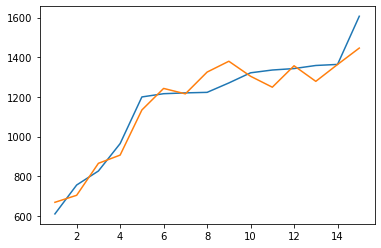

In [53]:
close_predictions = model.predict(X_test)   
close_predictions = TargetVarScalerFit.inverse_transform(close_predictions)
close_predictions = close_predictions.flatten()
y_test = TargetVarScalerFit.inverse_transform(y_test)
y_test = y_test.flatten()
mae = sum(abs(close_predictions - y_test)) / y_test.shape[0]
print(mae)
NN_results = pd.DataFrame(columns = ['Actuals'])
NN_results['Predictions'] = close_predictions
NN_results['Actuals'] = y_test


NN_results.sort_values(by=['Actuals'],inplace = True)
NN_results['Plant Numbers'] = np.arange(1,16).tolist()
print(NN_results)
plt.plot(NN_results['Plant Numbers'],NN_results['Actuals'],NN_results['Plant Numbers'],NN_results['Predictions'])        

In [54]:
mae/np.average(NN_results['Actuals'])

0.049680258043951465